__Table of Contents__ (works only with downloaded notebook):

1) [Preparation](#first)

2) [Preselection](#second)

3) [Simple Regression Approach](#third)

4) [Trading with the O-U model](#fourth)

In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller
from statsmodels.tsa.vector_ar.vecm import coint_johansen
sns.set(style="whitegrid")

from itertools import product

# <a name=first></a>Preparation

In [2]:
data = pd.read_excel('Data/Data1.xlsx')
data.dropna(axis=1,how='all',inplace=True)
data.head()

Itraxx Main Generic  Unnamed: 1 Itraxx Xover Generic  Unnamed: 5  \
0                 Date  Last Price                 Date  Last Price   
1  2022-09-22 00:00:00     125.509  2022-09-22 00:00:00      619.11   
2  2022-09-21 00:00:00     122.361  2022-09-21 00:00:00     601.364   
3  2022-09-20 00:00:00     120.426  2022-09-20 00:00:00     596.787   
4  2022-09-16 00:00:00     112.323  2022-09-16 00:00:00     552.824   

        CDX IG Generic  Unnamed: 9  ER Itraxx Main Long Unnamed: 13  \
0                 Date  Last Price                 Date  Last Price   
1  2022-09-22 00:00:00     101.883  2022-09-22 00:00:00    113.3897   
2  2022-09-21 00:00:00     100.584  2022-09-21 00:00:00    113.5834   
3  2022-09-20 00:00:00      98.471  2022-09-20 00:00:00    113.6542   
4  2022-09-19 00:00:00      86.798  2022-09-16 00:00:00    113.7744   

  ER Itraxx Main Short Unnamed: 17  ...       ER CDX IG Long Unnamed: 29  \
0                 Date  Last Price  ...                 Date  Last Price   
1  2022-09-22 00:00:00     82.9305  ...  2022-09-22 00:00:00         NaN   
2  2022-09-21 00:00:00     82.8257  ...  2022-09-21 00:00:00    110.9141   
3  2022-09-20 00:00:00     82.8096  ...  2022-09-20 00:00:00    111.0292   
4  2022-09-16 00:00:00     82.7576  ...  2022-09-19 00:00:00    111.2009   

       ER CDX IG Short Unnamed: 33                  SPX Unnamed: 37  \
0                 Date  Last Price                 Date  Last Price   
1  2022-09-22 00:00:00         NaN  2022-09-22 00:00:00     3778.47   
2  2022-09-21 00:00:00     84.9577  2022-09-21 00:00:00     3789.93   
3  2022-09-20 00:00:00     84.8987  2022-09-20 00:00:00     3855.93   
4  2022-09-19 00:00:00     84.7962  2022-09-19 00:00:00     3899.89   

  Unnamed: 38                 SX5E Unnamed: 42 Unnamed: 43  
0      Volume                 Date  Last Price      Volume  
1           0  2022-09-22 00:00:00   3427.1399         NaN  
2   650767104  2022-09-21 00:00:00   3491.8701   282749440  
3   606929216  2022-09-20 00:00:00   3467.0901   355137088  
4   609422592  2022-09-19 00:00:00     3499.49   245934352  

[5 rows x 24 columns]

In [3]:
new_cols = []
for i in range(len(data.columns)):
    new_cols.append(data.columns[i] if not data.columns[i].startswith('Unnamed') else new_cols[-1])
data.columns = pd.MultiIndex.from_arrays([new_cols, data.iloc[0]])
data.drop(index=0, inplace=True)
data.head()

Itraxx Main Generic            Itraxx Xover Generic             \
0                 Date Last Price                 Date Last Price   
1  2022-09-22 00:00:00    125.509  2022-09-22 00:00:00     619.11   
2  2022-09-21 00:00:00    122.361  2022-09-21 00:00:00    601.364   
3  2022-09-20 00:00:00    120.426  2022-09-20 00:00:00    596.787   
4  2022-09-16 00:00:00    112.323  2022-09-16 00:00:00    552.824   
5  2022-09-15 00:00:00    108.886  2022-09-15 00:00:00    538.099   

        CDX IG Generic             ER Itraxx Main Long             \
0                 Date Last Price                 Date Last Price   
1  2022-09-22 00:00:00    101.883  2022-09-22 00:00:00   113.3897   
2  2022-09-21 00:00:00    100.584  2022-09-21 00:00:00   113.5834   
3  2022-09-20 00:00:00     98.471  2022-09-20 00:00:00   113.6542   
4  2022-09-19 00:00:00     86.798  2022-09-16 00:00:00   113.7744   
5  2022-09-16 00:00:00      89.17  2022-09-15 00:00:00     113.99   

  ER Itraxx Main Short             ...       ER CDX IG Long             \
0                 Date Last Price  ...                 Date Last Price   
1  2022-09-22 00:00:00    82.9305  ...  2022-09-22 00:00:00        NaN   
2  2022-09-21 00:00:00    82.8257  ...  2022-09-21 00:00:00   110.9141   
3  2022-09-20 00:00:00    82.8096  ...  2022-09-20 00:00:00   111.0292   
4  2022-09-16 00:00:00    82.7576  ...  2022-09-19 00:00:00   111.2009   
5  2022-09-15 00:00:00    82.6014  ...  2022-09-16 00:00:00   111.0792   

       ER CDX IG Short                             SPX                         \
0                 Date Last Price                 Date Last Price      Volume   
1  2022-09-22 00:00:00        NaN  2022-09-22 00:00:00    3778.47           0   
2  2022-09-21 00:00:00    84.9577  2022-09-21 00:00:00    3789.93   650767104   
3  2022-09-20 00:00:00    84.8987  2022-09-20 00:00:00    3855.93   606929216   
4  2022-09-19 00:00:00    84.7962  2022-09-19 00:00:00    3899.89   609422592   
5  2022-09-16 00:00:00    84.8893  2022-09-16 00:00:00    3873.33  2094243200   

                  SX5E                        
0                 Date Last Price     Volume  
1  2022-09-22 00:00:00  3427.1399        NaN  
2  2022-09-21 00:00:00  3491.8701  282749440  
3  2022-09-20 00:00:00  3467.0901  355137088  
4  2022-09-19 00:00:00    3499.49  245934352  
5  2022-09-16 00:00:00  3500.4099  683948800  

[5 rows x 24 columns]

In [4]:
# for multiindex slicing 
idx = pd.IndexSlice

Our trading pairs

In [5]:
party1 = ['ER Itraxx Main Long', 'ER Itraxx Xover Long', 'ER CDX IG Long']
party2 = ['SPX', 'SX5E']

In [6]:
data = data[party1+party2]
data

ER Itraxx Main Long            ER Itraxx Xover Long             \
0                     Date Last Price                 Date Last Price   
1      2022-09-22 00:00:00   113.3897  2022-09-22 00:00:00   196.4054   
2      2022-09-21 00:00:00   113.5834  2022-09-21 00:00:00   197.6984   
3      2022-09-20 00:00:00   113.6542  2022-09-20 00:00:00   197.7231   
4      2022-09-16 00:00:00   113.7744  2022-09-16 00:00:00   198.5412   
5      2022-09-15 00:00:00     113.99  2022-09-15 00:00:00   199.9603   
...                    ...        ...                  ...        ...   
11828                  NaN        NaN                  NaN        NaN   
11829                  NaN        NaN                  NaN        NaN   
11830                  NaN        NaN                  NaN        NaN   
11831                  NaN        NaN                  NaN        NaN   
11832                  NaN        NaN                  NaN        NaN   

            ER CDX IG Long                             SPX             \
0                     Date Last Price                 Date Last Price   
1      2022-09-22 00:00:00        NaN  2022-09-22 00:00:00    3778.47   
2      2022-09-21 00:00:00   110.9141  2022-09-21 00:00:00    3789.93   
3      2022-09-20 00:00:00   111.0292  2022-09-20 00:00:00    3855.93   
4      2022-09-19 00:00:00   111.2009  2022-09-19 00:00:00    3899.89   
5      2022-09-16 00:00:00   111.0792  2022-09-16 00:00:00    3873.33   
...                    ...        ...                  ...        ...   
11828                  NaN        NaN  1975-11-20 00:00:00      89.64   
11829                  NaN        NaN  1975-11-19 00:00:00      89.98   
11830                  NaN        NaN  1975-11-18 00:00:00         91   
11831                  NaN        NaN  1975-11-17 00:00:00      91.46   
11832                  NaN        NaN  1975-11-14 00:00:00      90.97   

                                  SX5E                        
0          Volume                 Date Last Price     Volume  
1               0  2022-09-22 00:00:00  3427.1399        NaN  
2       650767104  2022-09-21 00:00:00  3491.8701  282749440  
3       606929216  2022-09-20 00:00:00  3467.0901  355137088  
4       609422592  2022-09-19 00:00:00    3499.49  245934352  
5      2094243200  2022-09-16 00:00:00  3500.4099  683948800  
...           ...                  ...        ...        ...  
11828         NaN                  NaN        NaN        NaN  
11829         NaN                  NaN        NaN        NaN  
11830         NaN                  NaN        NaN        NaN  
11831         NaN                  NaN        NaN        NaN  
11832         NaN                  NaN        NaN        NaN  

[11832 rows x 12 columns]

In [7]:
for c in data.columns:
    if c[1] == 'Date':
        data[idx[c[0], c[1]]] = pd.to_datetime(data.loc[:, idx[c[0], c[1]]])

Let's allign our data by dates:

In [8]:
data.columns = [x+'_'+y for x, y in data.columns]
tmp = data[['SPX_Date', 'SPX_Last Price', 'SPX_Volume']].copy()

for p in party1:
    tmp = pd.merge(left=tmp, right=data[[p+'_Date', p+'_Last Price']], how='left',
                   left_on='SPX_Date', right_on=p+'_Date')

tmp = pd.merge(left=tmp, right=data[['SX5E_Date', 'SX5E_Last Price', 'SX5E_Volume']], how='left',
               left_on='SPX_Date', right_on='SX5E_Date')

tmp.columns = pd.MultiIndex.from_tuples([x.split('_') for x in tmp.columns])

In [9]:
# drop unrelevant rows
data = tmp[~tmp[party1].isna().all(axis=1)]
data.isna().sum()

SPX                   Date           0
                      Last Price     0
                      Volume         0
ER Itraxx Main Long   Date          81
                      Last Price    81
ER Itraxx Xover Long  Date          81
                      Last Price    81
ER CDX IG Long        Date          29
                      Last Price    30
SX5E                  Date          24
                      Last Price    24
                      Volume        30
dtype: int64

In [10]:
data.shape

(3907, 12)

Thus, we have at most 81 NAs out of 3907 trading days.

In [11]:
data = data.sort_values(by=('SPX', 'Date'))
data.reset_index(drop=True, inplace=True)

Transforming prices to numeric values.

In [12]:
for s in data.loc[:, idx[:, 'Last Price']].columns:
    data[s] = pd.to_numeric(data[s])

In [495]:
data.to_excel('data/data_prepared.xlsx')

# <a name=second></a> Preselection

Unit root testing with Augmented Dickey-Fuller:

In [13]:
data

SPX                        ER Itraxx Main Long             \
           Date Last Price      Volume                Date Last Price   
0    2007-03-20    1410.94  1182479104          2007-03-20   100.0000   
1    2007-03-21    1435.04  1399847424          2007-03-21   100.0287   
2    2007-03-22    1434.54  1286669440          2007-03-22   100.0833   
3    2007-03-23    1436.11  1122459392          2007-03-23   100.1090   
4    2007-03-26    1437.50  1187999488          2007-03-26   100.1063   
...         ...        ...         ...                 ...        ...   
3902 2022-09-16    3873.33  2094243200          2022-09-16   113.7744   
3903 2022-09-19    3899.89   609422592                 NaT        NaN   
3904 2022-09-20    3855.93   606929216          2022-09-20   113.6542   
3905 2022-09-21    3789.93   650767104          2022-09-21   113.5834   
3906 2022-09-22    3778.47           0          2022-09-22   113.3897   

     ER Itraxx Xover Long            ER CDX IG Long                  SX5E  \
                     Date Last Price           Date Last Price       Date   
0              2007-03-20   100.0000     2007-03-20   100.0000 2007-03-20   
1              2007-03-21   100.2951     2007-03-21   100.0850 2007-03-21   
2              2007-03-22   100.8037     2007-03-22   100.1147 2007-03-22   
3              2007-03-23   100.8924     2007-03-23   100.1108 2007-03-23   
4              2007-03-26   100.7493     2007-03-26   100.0683 2007-03-26   
...                   ...        ...            ...        ...        ...   
3902           2022-09-16   198.5412     2022-09-16   111.0792 2022-09-16   
3903                  NaT        NaN     2022-09-19   111.2009 2022-09-19   
3904           2022-09-20   197.7231     2022-09-20   111.0292 2022-09-20   
3905           2022-09-21   197.6984     2022-09-21   110.9141 2022-09-21   
3906           2022-09-22   196.4054     2022-09-22        NaN 2022-09-22   

                             
     Last Price      Volume  
0     4079.5200   913446592  
1     4078.2900   862450368  
2     4170.0801  1174437248  
3     4191.5801   921907136  
4     4142.1099   989358720  
...         ...         ...  
3902  3500.4099   683948800  
3903  3499.4900   245934352  
3904  3467.0901   355137088  
3905  3491.8701   282749440  
3906  3427.1399         NaN  

[3907 rows x 12 columns]

In [14]:
ALPHA = 0.05

In [15]:
unit_root_tests = {}

for p in party1+party2:
    prices = data[idx[p, 'Last Price']]
    prices = prices.dropna()
    p_value = adfuller(prices)[1]
    unit_root_tests[p] = {'p-value': p_value, 'unit_root': p_value>=ALPHA}
unit_root_tests

{'ER Itraxx Main Long': {'p-value': 0.8875514509665652, 'unit_root': True},
 'ER Itraxx Xover Long': {'p-value': 0.8111063536974721, 'unit_root': True},
 'ER CDX IG Long': {'p-value': 0.9053187191858854, 'unit_root': True},
 'SPX': {'p-value': 0.967392728327911, 'unit_root': True},
 'SX5E': {'p-value': 0.09850492366623548, 'unit_root': True}}

All of the stocks have a unit root. Next, we make a tests on cointegration:

In [16]:
coint_tests = {}

for p1, p2 in product(party1, party2):
    print(p1, p2)
    prices = data[[p1, p2]].copy()
    prices.dropna(axis=0, inplace=True)
    prices1 = prices[idx[p1, 'Last Price']]
    prices2 = prices[idx[p2, 'Last Price']]
    
    p_value = coint(prices1, prices2, trend='ct')[1]
    coint_tests[p1+' vs '+p2] = {'p-value': p_value, 'coint': True if p_value<ALPHA else False}

ER Itraxx Main Long SPX
ER Itraxx Main Long SX5E
ER Itraxx Xover Long SPX
ER Itraxx Xover Long SX5E
ER CDX IG Long SPX
ER CDX IG Long SX5E


In [17]:
coint_tests

{'ER Itraxx Main Long vs SPX': {'p-value': 0.5373821666773552, 'coint': False},
 'ER Itraxx Main Long vs SX5E': {'p-value': 0.5575423069398479,
  'coint': False},
 'ER Itraxx Xover Long vs SPX': {'p-value': 0.9185494928323249,
  'coint': False},
 'ER Itraxx Xover Long vs SX5E': {'p-value': 0.9980764983824985,
  'coint': False},
 'ER CDX IG Long vs SPX': {'p-value': 0.30888346299875635, 'coint': False},
 'ER CDX IG Long vs SX5E': {'p-value': 0.6603687330533687, 'coint': False}}

I.e. ER Itraxx Main Long vs SPX and SX5E, ER CDX IG Long vs SPX and SX5E are our best candidates.

Johansen cointegration test:

In [19]:
res = coint_johansen(data.loc[:,idx[party1+party2, 'Last Price']].dropna(how='any',axis=0), det_order=0, k_ar_diff=1)

In [20]:
res.trace_stat[0] > res.trace_stat_crit_vals[0][1]

False

That means, due to a Johansen test we don't have any cointegration in our data. If we check a yearly data:

In [21]:
results = {}
dates = data.loc[:,idx['SPX', 'Date']]
for y in dates.dt.year.unique():
    results[y] = coint_johansen(data.loc[dates.dt.year==y,idx[party1+party2, 'Last Price']].dropna(how='any',axis=0), det_order=0, k_ar_diff=1)
    print(res.trace_stat[0] > res.trace_stat_crit_vals[0][1])

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


However, if we add a time term:

In [22]:
res = coint_johansen(data.loc[:,idx[party1+party2, 'Last Price']].dropna(how='any',axis=0), det_order=1, k_ar_diff=1)

In [23]:
res.trace_stat[0] > res.trace_stat_crit_vals[0][1]

True

Thus, we have cointegrated pairs with linear term, let's find them:

In [24]:
for p1, p2 in product(party1, party2):
    res = coint_johansen(data.loc[:,idx[[p1,p2], 'Last Price']].dropna(how='any',axis=0),
                         det_order=1, k_ar_diff=1)
    print(p1, ' vs ', p2)
    print(res.trace_stat[0] > res.trace_stat_crit_vals[0][1])

ER Itraxx Main Long  vs  SPX
True
ER Itraxx Main Long  vs  SX5E
True
ER Itraxx Xover Long  vs  SPX
False
ER Itraxx Xover Long  vs  SX5E
False
ER CDX IG Long  vs  SPX
True
ER CDX IG Long  vs  SX5E
True


We observe cointegration of ER Itraxx Main Long vs SPX and SX5E, let's check wether they're cointegrated together:

In [25]:
res = coint_johansen(data.loc[:,idx[['ER Itraxx Main Long', 'SPX', 'SX5E'], 'Last Price']].dropna(how='any',axis=0), det_order=1, k_ar_diff=1)

In [26]:
res.trace_stat[0] > res.trace_stat_crit_vals[0][1],res.trace_stat[1] > res.trace_stat_crit_vals[1][1]

(True, False)

That means the answer is 'NO' under 5% confidence, however under 10%:

In [27]:
res.trace_stat[1] > res.trace_stat_crit_vals[1][0]

True

Thus, we could also try quasi-multivariate trading with them.

We also observe cointegration of ER CDX IG Long vs SPX and SX5E, let's check wether they're cointegrated together:

In [28]:
res = coint_johansen(data.loc[:,idx[['ER CDX IG Long', 'SPX', 'SX5E'], 'Last Price']].dropna(how='any',axis=0), det_order=1, k_ar_diff=1)

In [29]:
res.trace_stat[0] > res.trace_stat_crit_vals[0][1],res.trace_stat[1] > res.trace_stat_crit_vals[1][1], res.trace_stat[2] > res.trace_stat_crit_vals[2][1]

(True, True, True)

That means, these three prices are cointegrated.

QUESTION: could we use it in some way?

# <a name=third> </a>Simple Regression approach

### ER Itraxx Main Long vs SPX, SX5E

Let's try the following simple strategy: due to 60-days formation period we regress ER Itraxx Main Long on SPX, SX5 and during the next 30 days we use coefficients of the regression to modulate a spread. Our trading signals are generated as the divergence from 45-days moving average.

In [325]:
tmp = data.loc[:, idx[['SPX', 'SX5E','ER Itraxx Main Long'], :]].dropna(how='any', axis=0)
tmp.reset_index(drop=True, inplace=True)
dates = tmp[idx['SPX', 'Date']]
tmp = tmp.loc[:,idx[:, 'Last Price']]
tmp.columns = [x[0] for x in tmp.columns]
tmp.index = dates
tmp.head()

SPX       SX5E  ER Itraxx Main Long
(SPX, Date)                                         
2007-03-20   1410.94  4079.5200             100.0000
2007-03-21   1435.04  4078.2900             100.0287
2007-03-22   1434.54  4170.0801             100.0833
2007-03-23   1436.11  4191.5801             100.1090
2007-03-26   1437.50  4142.1099             100.1063

In [326]:
index = 'ER Itraxx Main Long'
stocks = ['SPX', 'SX5E']

In [327]:
FORM = 60 # formation
TRAD = 30 # trading
WIND = 45 # moving average window
long_threshold = 1 # signal for long
short_threshold = 1 # signal for short
results = pd.DataFrame(index=dates[FORM:], columns=['spread', 'ma', 'mstd', 'position'])
betas = pd.DataFrame(index=dates[FORM:], columns=stocks)

for i in range(len(dates[FORM:])//TRAD+1):
    date = dates[FORM+TRAD*i] # first trading day
    formation = tmp.loc[:date].copy()
    formation = formation.iloc[-FORM-1:-1] # FORM-days formation period before the trading
    lr = sm.OLS(formation[index], formation[stocks])
    model = lr.fit()
    coefs = model.params
    
    trading = tmp.loc[date:].copy() # TRAD-days trading period
    trading = trading.iloc[:TRAD]
    trading_per = trading.shape[0] # to account for the last period
    trading = pd.concat([formation, trading]) # for mooving average computation
    trading['spread'] = trading[index]-trading[stocks]@coefs
    trading['ma'] = trading['spread'].rolling(window=WIND).mean()
    trading['mstd'] = trading['spread'].rolling(window=WIND).std()
    trading = trading.iloc[-trading_per:] # leave TRAD days again for trading period
    
    poses = results.loc[trading.index, 'position'] # trading positions
    poses.loc[trading['spread']>trading['ma']+short_threshold*trading['mstd']] = -1 # short
    poses.loc[trading['spread']<trading['ma']-long_threshold*trading['mstd']] = 1 # long
    poses.loc[((trading['spread'].shift()<trading['ma'].shift())) & (trading['spread']>=trading['ma'])] = 0 # no zero-crossing kills position
    poses.loc[((trading['spread'].shift()>trading['ma'].shift())) & (trading['spread']<=trading['ma'])] = 0 # no zero-crossing after short
    if np.isnan(poses.iloc[0]):
        poses.iloc[0] = 0
    poses.fillna(method='ffill', inplace=True)

    betas.loc[trading.index[0]] = coefs
    betas.loc[trading.index] = betas.loc[trading.index].fillna(method='ffill')
    results.loc[trading.index, 'position'] = poses
    results.loc[trading.index, 'ma'] = trading['ma']
    results.loc[trading.index, 'mstd'] = trading['mstd']
    results.loc[trading.index, 'spread'] = trading['spread']

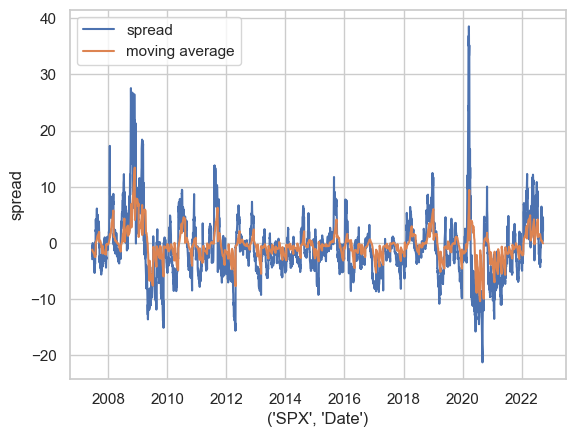

In [328]:
sns.lineplot(results['spread'], label='spread')
sns.lineplot(results['ma'], label='moving average')
plt.show()

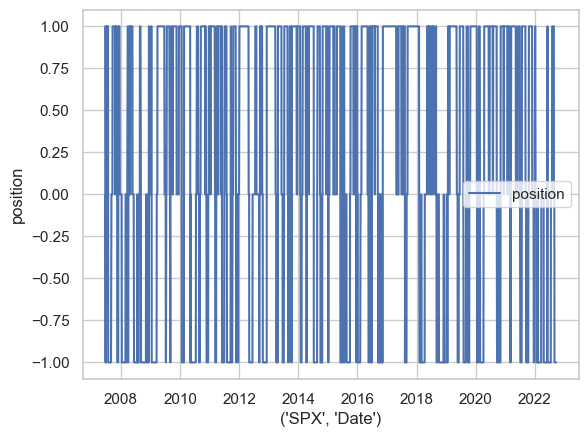

In [329]:
sns.lineplot(results['position'], label='position')
plt.show()

Next, we compute today's portfolio return as difference between the current spread of our position and the previous spread divided by the amount of money invested:

In [331]:
spread_pct_change = (results.spread-results.spread.shift())/(tmp[FORM:]['ER Itraxx Main Long'].shift() + betas['SPX'].shift()*tmp[FORM:]['SPX'].shift() + betas['SX5E'].shift()*tmp[FORM:]['SX5E'].shift())
daily_returns = spread_pct_change*results.position.shift() # as we've taken position the day before
cumul_returns = (daily_returns+1).cumprod().fillna(1)

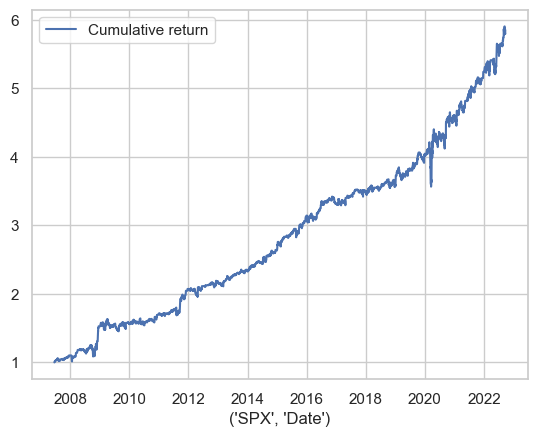

In [332]:
sns.lineplot(cumul_returns, label='Cumulative return')
plt.show()

Yearly relative return:

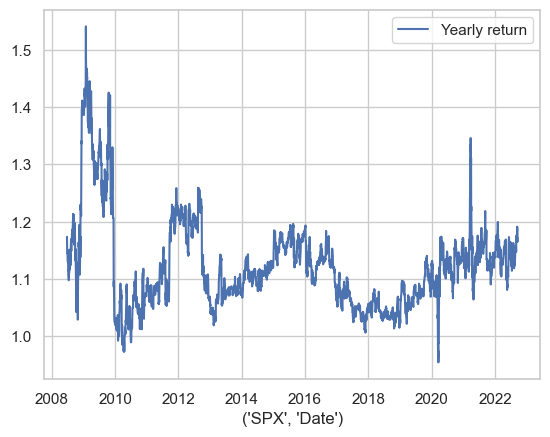

In [333]:
sns.lineplot(cumul_returns/cumul_returns.shift(252), label='Yearly return')
plt.show()

Maximum drawdown:

In [334]:
roll_max = cumul_returns.rolling(252, min_periods=1).max()
daily_dd = cumul_returns/roll_max - 1.0
max_daily_dd = daily_dd.rolling(252, min_periods=1).min()

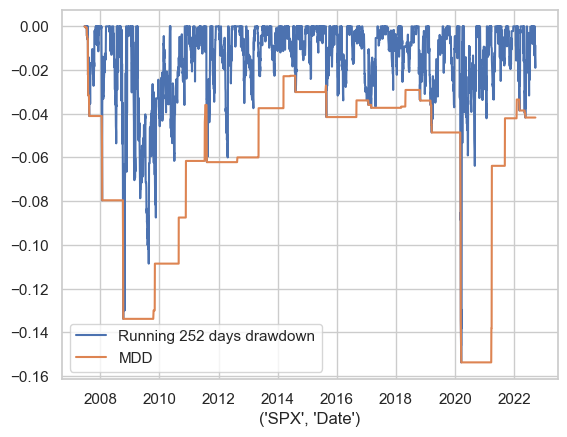

In [335]:
sns.lineplot(daily_dd, label='Running 252 days drawdown')
sns.lineplot(max_daily_dd, label='MDD')
plt.show()

Final statistics:

In [336]:
def calculate_stats(cumrets):
    if not isinstance(cumrets, (pd.Series, pd.DataFrame)):
        cumrets = pd.Series(cumrets)
    total_return = (cumrets.iloc[-1] - cumrets.iloc[0])/cumrets.iloc[0]
    returns = cumrets.pct_change()
    sharpe = np.sqrt(252) * np.nanmean(returns) / np.nanstd(returns)
    roll_max = cumrets.rolling(252, min_periods=1).max()
    daily_dd = cumrets/roll_max - 1.0
    max_daily_dd = daily_dd.rolling(252, min_periods=1).min()
    return total_return, sharpe, min(max_daily_dd)

In [337]:
results = pd.DataFrame(index=['Strategy', 'ER Itraxx Main Long', 'SPX', 'SX5E'], columns = ['Total return', 'Sharpe', 'MDD'])
results.loc['Strategy'] = calculate_stats(cumul_returns)
results.loc['SPX'] = calculate_stats(np.nancumprod(tmp[WIND-1:]['SPX'].pct_change()+1))
results.loc['SX5E'] = calculate_stats(np.nancumprod(tmp[WIND-1:]['SX5E'].pct_change()+1))
results.loc['ER Itraxx Main Long'] = calculate_stats(np.nancumprod(tmp[WIND-1:]['ER Itraxx Main Long'].pct_change()+1))
results

Total return    Sharpe       MDD
Strategy                4.852837  1.085485 -0.153774
ER Itraxx Main Long     0.132451  0.338777 -0.058557
SPX                     1.500399  0.396931 -0.525785
SX5E                   -0.217687  0.046171 -0.533784

### ER CDX IG Long vs SPX, SX5E

We repeat the previous strategy.

In [288]:
tmp = data.loc[:, idx[['SPX', 'SX5E','ER CDX IG Long'], :]].dropna(how='any', axis=0)
tmp.reset_index(drop=True, inplace=True)
dates = tmp[idx['SPX', 'Date']]
tmp = tmp.loc[:,idx[:, 'Last Price']]
tmp.columns = [x[0] for x in tmp.columns]
tmp.index = dates
tmp.head()

SPX       SX5E  ER CDX IG Long
(SPX, Date)                                    
2007-03-20   1410.94  4079.5200        100.0000
2007-03-21   1435.04  4078.2900        100.0850
2007-03-22   1434.54  4170.0801        100.1147
2007-03-23   1436.11  4191.5801        100.1108
2007-03-26   1437.50  4142.1099        100.0683

In [289]:
index = 'ER CDX IG Long'
stocks = ['SPX', 'SX5E']

In [321]:
FORM = 60 # formation
TRAD = 30 # trading
WIND = 45 # moving average window
long_threshold = 1 # signal for long
short_threshold = 1 # signal for short
results = pd.DataFrame(index=dates[FORM:], columns=['spread', 'ma', 'mstd', 'position'])
betas = pd.DataFrame(index=dates[FORM:], columns=stocks)

for i in range(len(dates[FORM:])//TRAD+1):
    date = dates[FORM+TRAD*i] # first trading day
    formation = tmp.loc[:date].copy()
    formation = formation.iloc[-FORM-1:-1] # FORM-days formation period before the trading
    lr = sm.OLS(formation[index], formation[stocks])
    model = lr.fit()
    coefs = model.params
    
    trading = tmp.loc[date:].copy() # TRAD-days trading period
    trading = trading.iloc[:TRAD]
    trading_per = trading.shape[0] # to account for the last period
    trading = pd.concat([formation, trading]) # for mooving average computation
    trading['spread'] = trading[index]-trading[stocks]@coefs
    trading['ma'] = trading['spread'].rolling(window=WIND).mean()
    trading['mstd'] = trading['spread'].rolling(window=WIND).std()
    trading = trading.iloc[-trading_per:] # leave TRAD days again for trading period
    
    poses = results.loc[trading.index, 'position'] # trading positions
    poses.loc[trading['spread']>trading['ma']+short_threshold*trading['mstd']] = -1 # short
    poses.loc[trading['spread']<trading['ma']-long_threshold*trading['mstd']] = 1 # long
    poses.loc[((trading['spread'].shift()<trading['ma'].shift())) & (trading['spread']>=trading['ma'])] = 0 # no zero-crossing kills position
    poses.loc[((trading['spread'].shift()>trading['ma'].shift())) & (trading['spread']<=trading['ma'])] = 0 # no zero-crossing after short
    if np.isnan(poses.iloc[0]):
        poses.iloc[0] = 0
    poses.fillna(method='ffill', inplace=True)

    betas.loc[trading.index[0]] = coefs
    betas.loc[trading.index] = betas.loc[trading.index].fillna(method='ffill')
    results.loc[trading.index, 'position'] = poses
    results.loc[trading.index, 'ma'] = trading['ma']
    results.loc[trading.index, 'mstd'] = trading['mstd']
    results.loc[trading.index, 'spread'] = trading['spread']

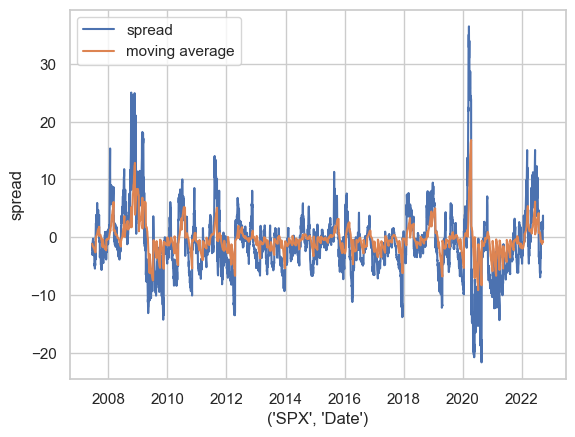

In [311]:
sns.lineplot(results['spread'], label='spread')
sns.lineplot(results['ma'], label='moving average')
plt.show()

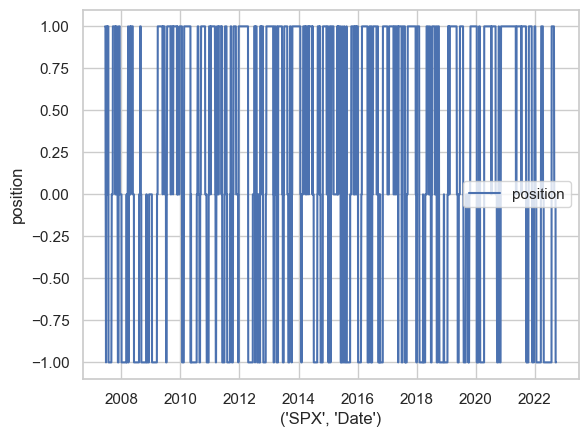

In [312]:
sns.lineplot(results['position'], label='position')
plt.show()

Next, we compute today's portfolio return as difference between the current spread of our position and the previous spread divided by the amount of money invested:

In [313]:
spread_pct_change = (results.spread-results.spread.shift())/(tmp[FORM:]['ER CDX IG Long'].shift() + betas['SPX'].shift()*tmp[FORM:]['SPX'].shift() + betas['SX5E'].shift()*tmp[FORM:]['SX5E'].shift())
daily_returns = spread_pct_change*results.position.shift() # as we've taken position the day before
cumul_returns = (daily_returns+1).cumprod().fillna(1)

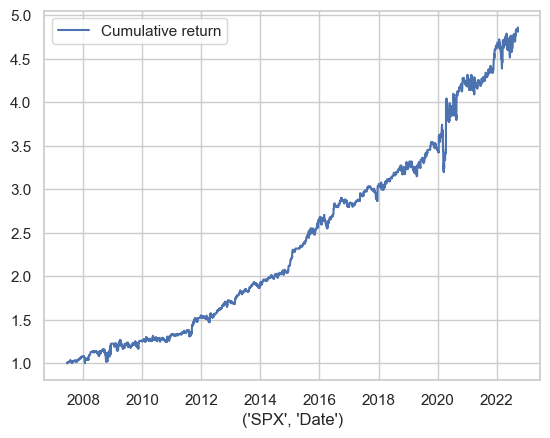

In [315]:
sns.lineplot(cumul_returns, label='Cumulative return')
plt.show()

Yearly relative return:

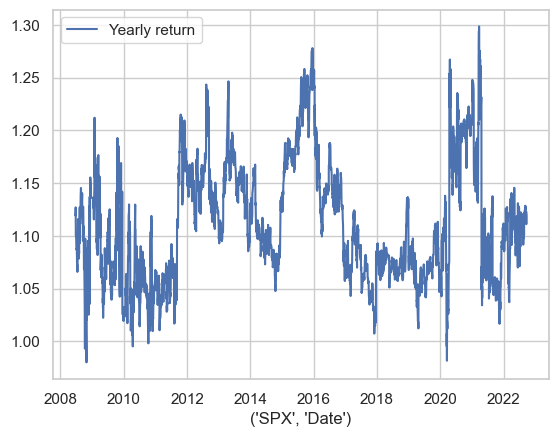

In [316]:
sns.lineplot(cumul_returns/cumul_returns.shift(252), label='Yearly return')
plt.show()

Maximum drawdown:

In [317]:
roll_max = cumul_returns.rolling(252, min_periods=1).max()
daily_dd = cumul_returns/roll_max - 1.0
max_daily_dd = daily_dd.rolling(252, min_periods=1).min()

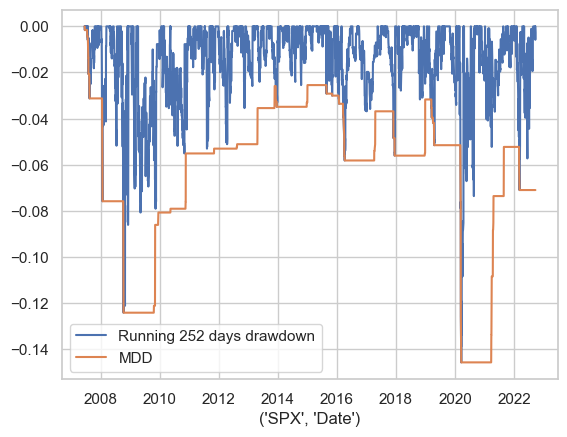

In [318]:
sns.lineplot(daily_dd, label='Running 252 days drawdown')
sns.lineplot(max_daily_dd, label='MDD')
plt.show()

Final statistics:

In [319]:
results = pd.DataFrame(index=['Strategy', 'ER CDX IG Long', 'SPX', 'SX5E'], columns = ['Total return', 'Sharpe', 'MDD'])
results.loc['Strategy'] = calculate_stats(cumul_returns)
results.loc['SPX'] = calculate_stats(np.nancumprod(tmp[WIND-1:]['SPX'].pct_change()+1))
results.loc['SX5E'] = calculate_stats(np.nancumprod(tmp[WIND-1:]['SX5E'].pct_change()+1))
results.loc['ER CDX IG Long'] = calculate_stats(np.nancumprod(tmp[WIND-1:]['ER CDX IG Long'].pct_change()+1))
results

Total return    Sharpe       MDD
Strategy           3.859329  0.887756 -0.145688
ER CDX IG Long     0.106879  0.291067 -0.086437
SPX                1.489641  0.394264 -0.525785
SX5E              -0.223975   0.04453 -0.533784

## Appendix: Regression with a time term

In [108]:
tmp = data.loc[:, idx[['SPX', 'SX5E','ER Itraxx Main Long'], :]].dropna(how='any', axis=0)
tmp.reset_index(drop=True, inplace=True)
exog = tmp.loc[:, idx[['SPX', 'SX5E'], 'Last Price']]
exog.columns = [1, 2]
# adding linear term
exog.reset_index(inplace=True)
exog.columns = ['term', 'SPX', 'SX5E']

In [37]:
mod = sm.OLS(tmp[idx['ER Itraxx Main Long', 'Last Price']], exog=exog[['const', 'term', 'SPX', 'SX5E']])
res = mod.fit()
print(res.summary())

                                      OLS Regression Results                                     
Dep. Variable:     ('ER Itraxx Main Long', 'Last Price')   R-squared:                       0.983
Model:                                               OLS   Adj. R-squared:                  0.983
Method:                                    Least Squares   F-statistic:                 7.332e+04
Date:                                   Sun, 11 Dec 2022   Prob (F-statistic):               0.00
Time:                                           00:28:27   Log-Likelihood:                -4842.6
No. Observations:                                   3823   AIC:                             9693.
Df Residuals:                                       3819   BIC:                             9718.
Df Model:                                              3                                         
Covariance Type:                               nonrobust                                         
                 coe

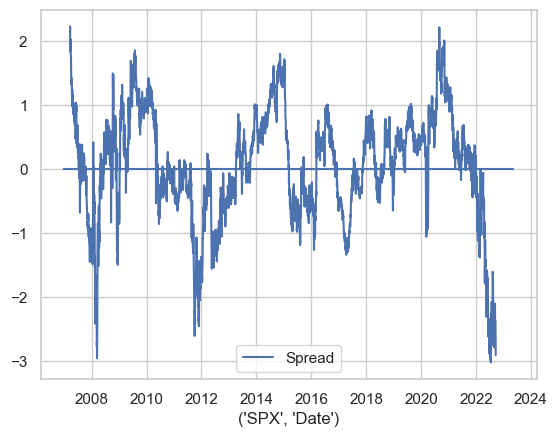

In [38]:
sns.lineplot(y=tmp[idx['ER Itraxx Main Long', 'Last Price']]-84.5210*exog['const']-0.0070*exog['term']+0.0024*exog['SPX']-0.0041*exog['SX5E'],
            x=tmp[idx['SPX', 'Date']],label='Spread')
plt.hlines(y=0, xmin=13500, xmax=19500)
plt.show()

It seems that here we observe more strict mean-reverting property.

### Testing with formation/trading periods

In [39]:
def _next_date(date, period, unit='month'):
    if not unit in ['month', 'day']:
        raise ValueError('Incorrect unit specification')
    
    if unit == 'month':
        if 0 < date.month + period < 13:
            return datetime.datetime(date.year, date.month+period, 1)
        elif date.month + period > 12:
            return datetime.datetime(date.year+1, (date.month+period)%12, 1)
        else: 
            return datetime.datetime(date.year-1, (date.month+period)%12, 1)
    if unit == 'day':
        return date + datetime.timedelta(days=period)

In [40]:
def _prepare_data(data, stocks, start_date, end_date):
    tmp = data.loc[:, idx[stocks, :]].dropna(how='any', axis=0)
    tmp = tmp[(tmp[idx[stocks[0], 'Date']] >= start_date) & (tmp[idx[stocks[0], 'Date']] < end_date)]
    tmp.reset_index(drop=True, inplace=True)
    dates = tmp.loc[:, idx[stocks[0], 'Date']]
    tmp = tmp.loc[:, idx[stocks, 'Last Price']]
    new_columns = [x[0] for x in tmp.columns.to_list()]
    # adding linear term
    tmp.reset_index(inplace=True)
    tmp.columns = ['term']+new_columns
    tmp = sm.add_constant(tmp)
    return tmp, dates

Start: 2007-07-01 00:00:00, end: 2009-01-01 00:00:00


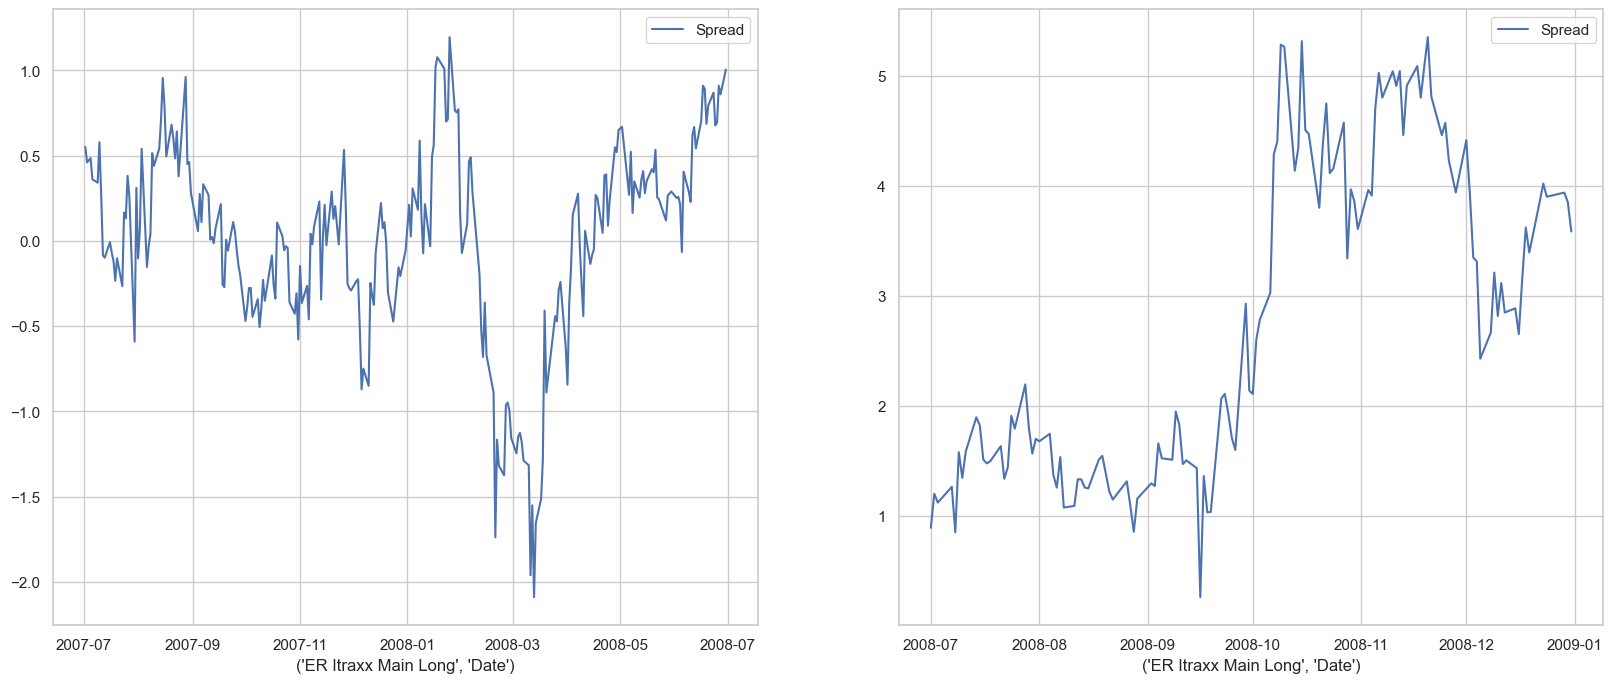

Start: 2008-01-01 00:00:00, end: 2009-07-01 00:00:00


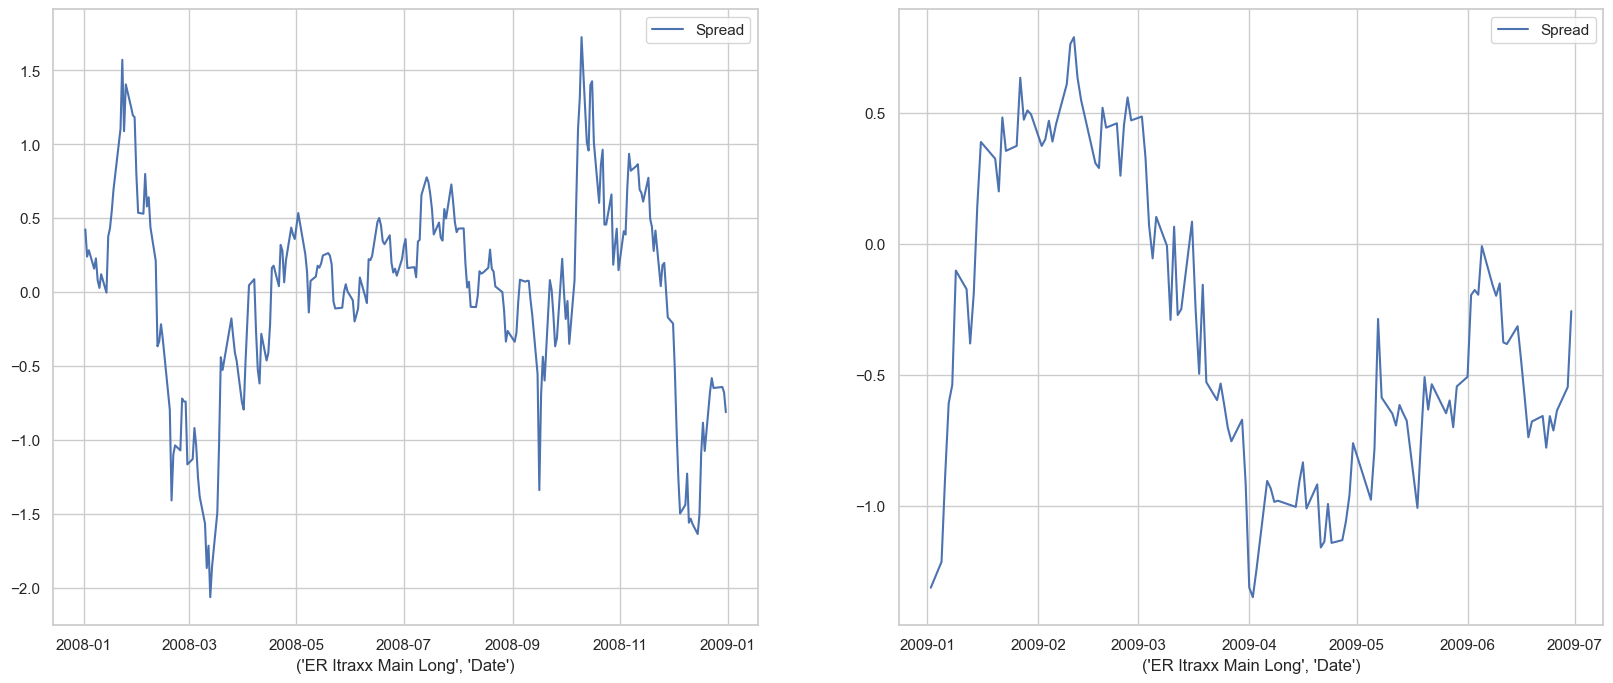

Start: 2008-07-01 00:00:00, end: 2010-01-01 00:00:00


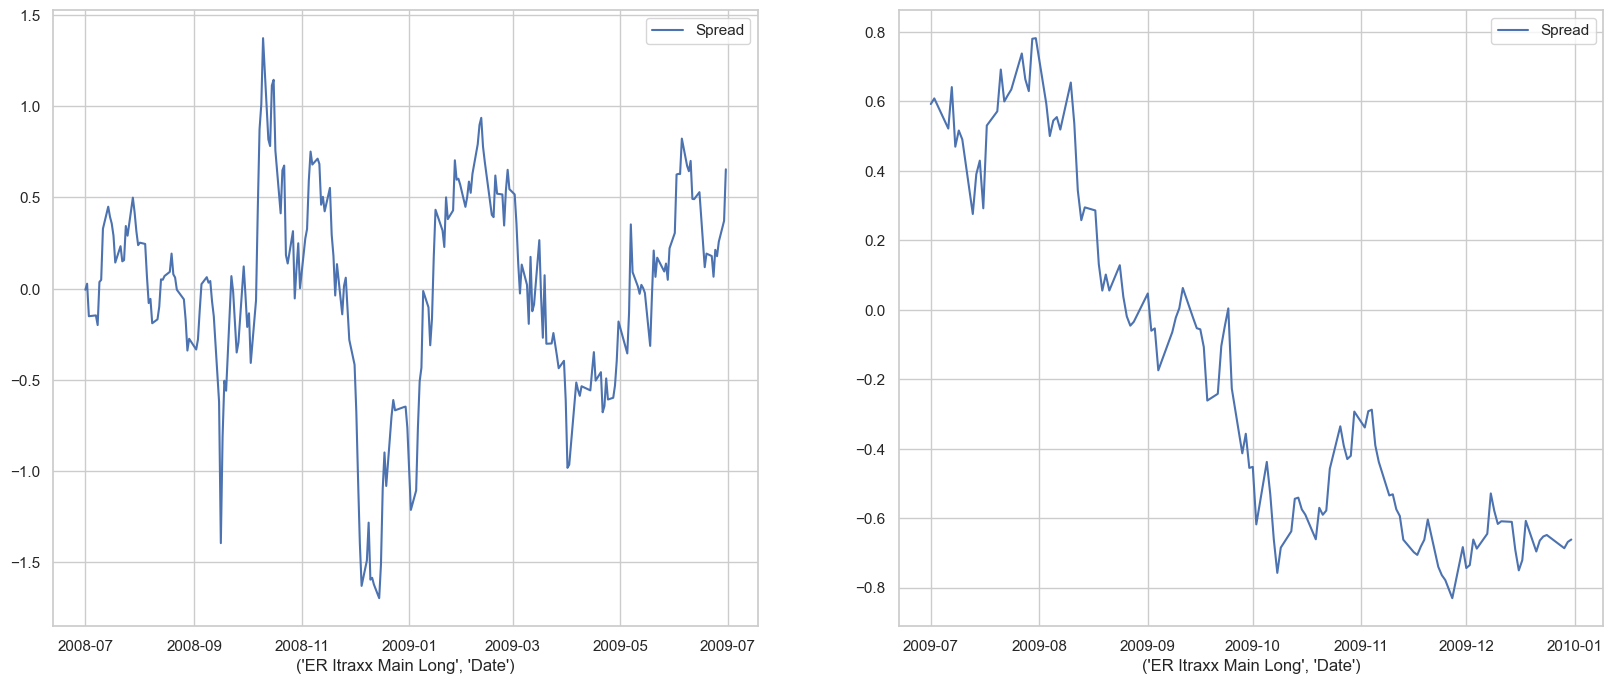

Start: 2009-01-01 00:00:00, end: 2010-07-01 00:00:00


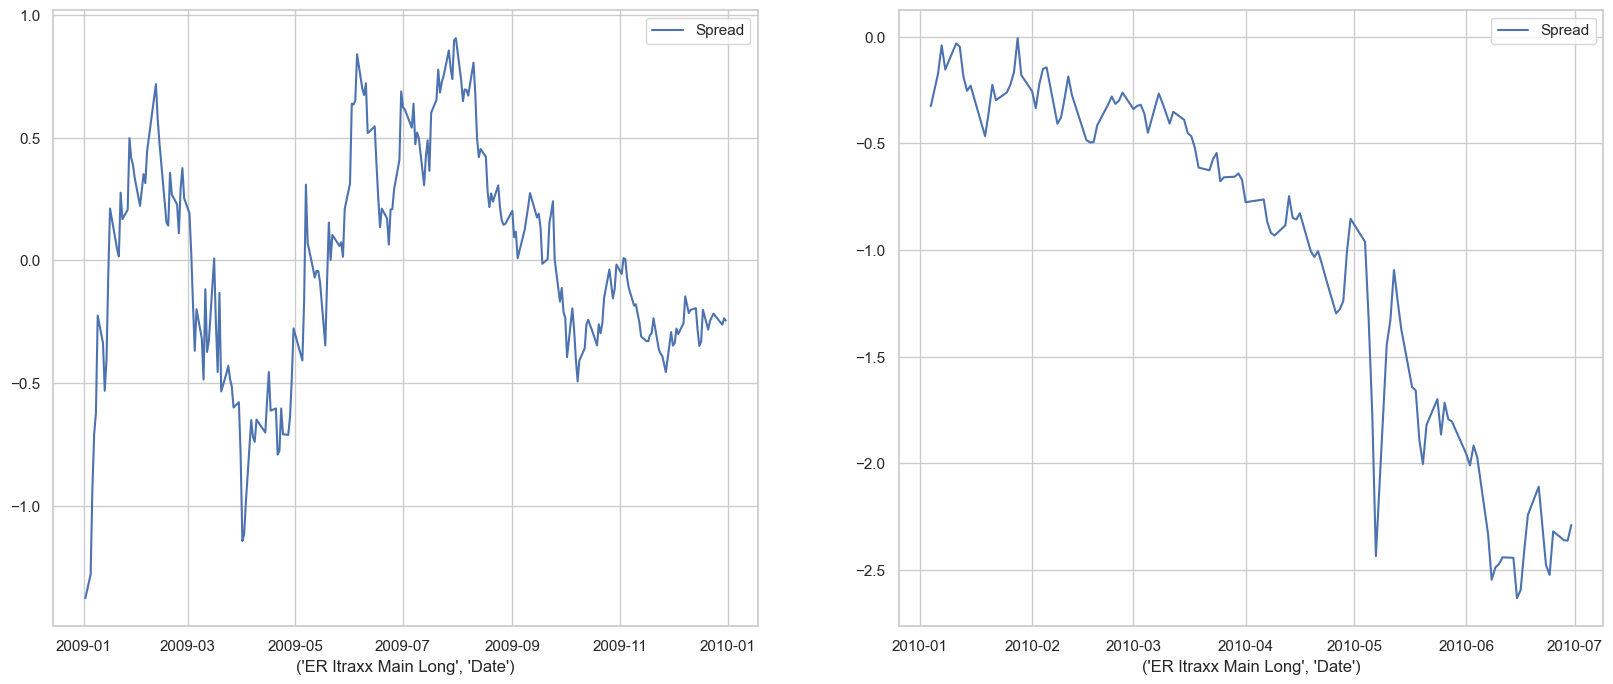

Start: 2009-07-01 00:00:00, end: 2011-01-01 00:00:00


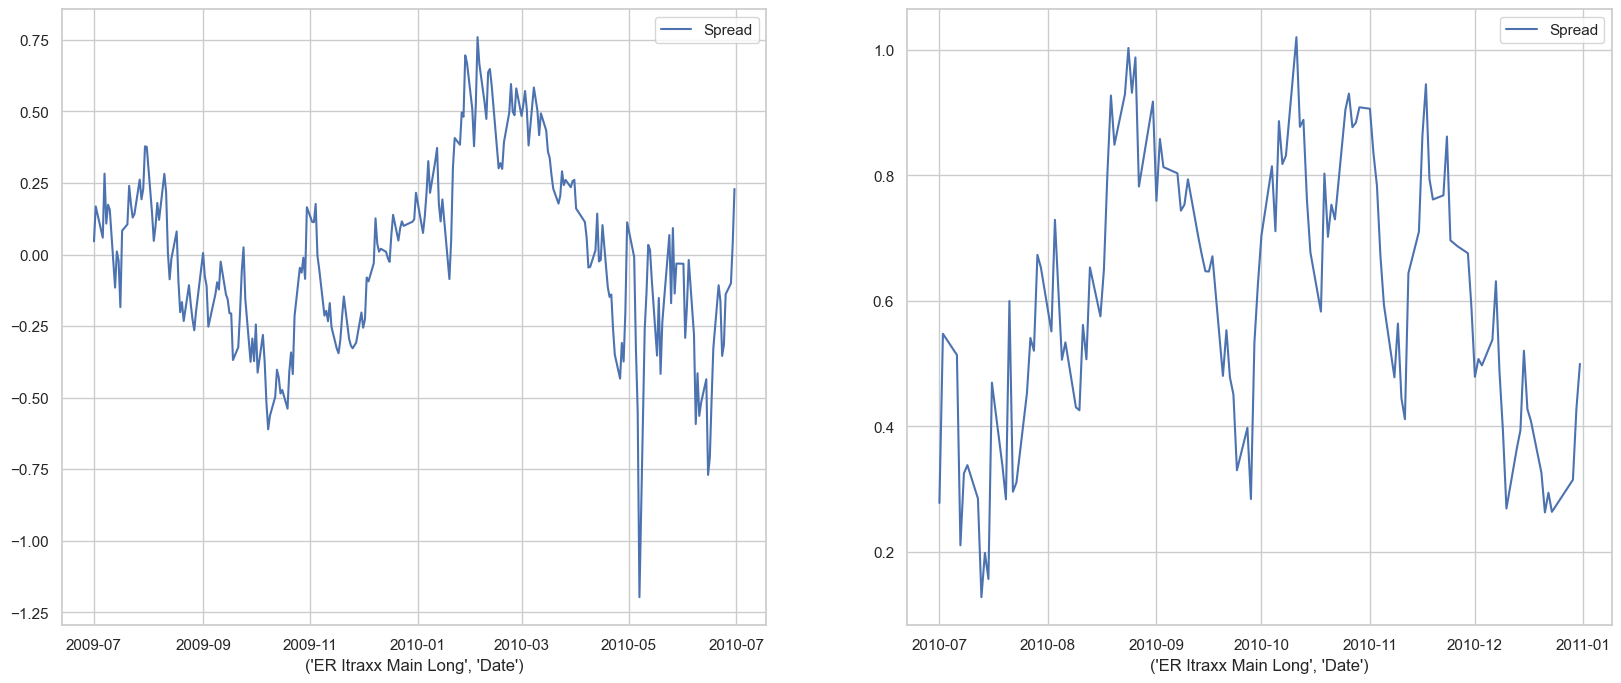

Start: 2010-01-01 00:00:00, end: 2011-07-01 00:00:00


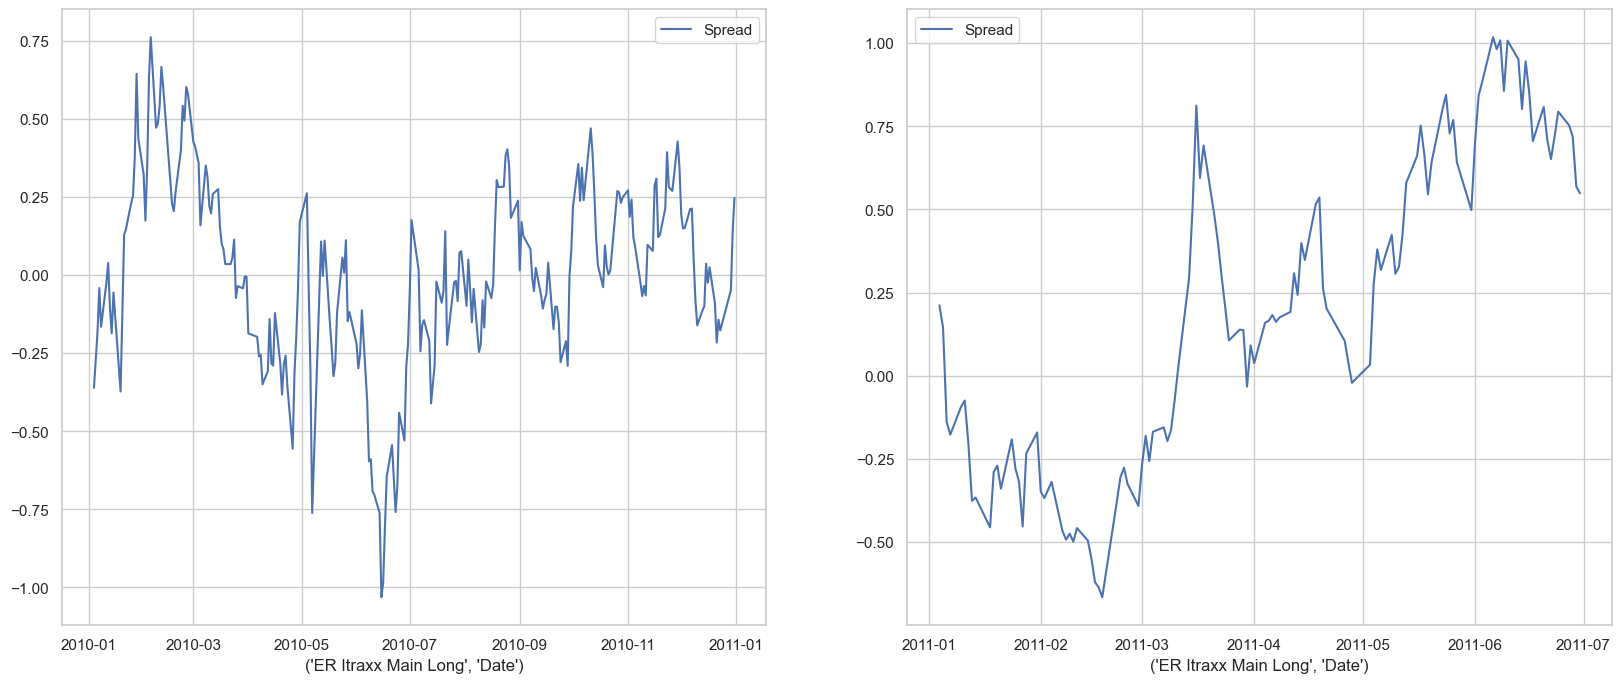

Start: 2010-07-01 00:00:00, end: 2012-01-01 00:00:00


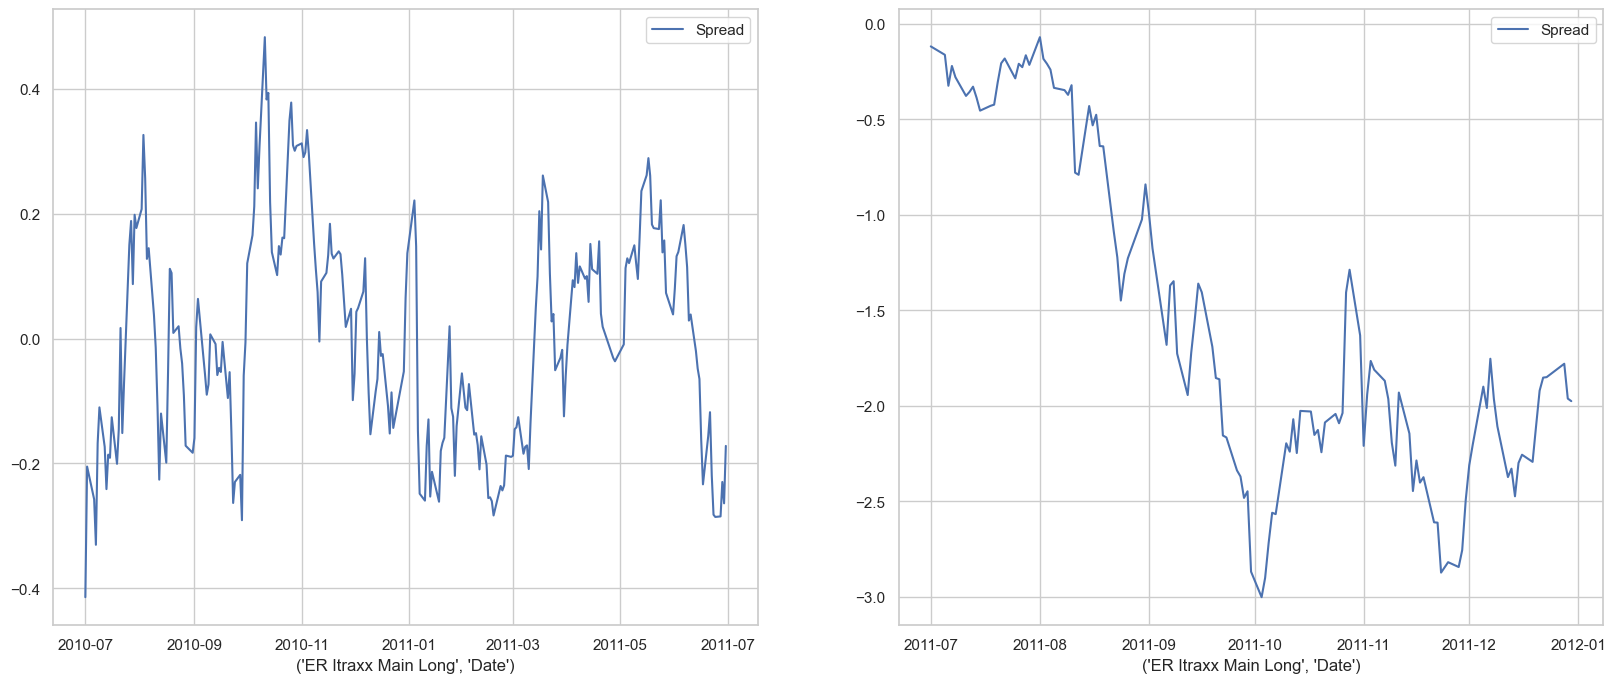

Start: 2011-01-01 00:00:00, end: 2012-07-01 00:00:00


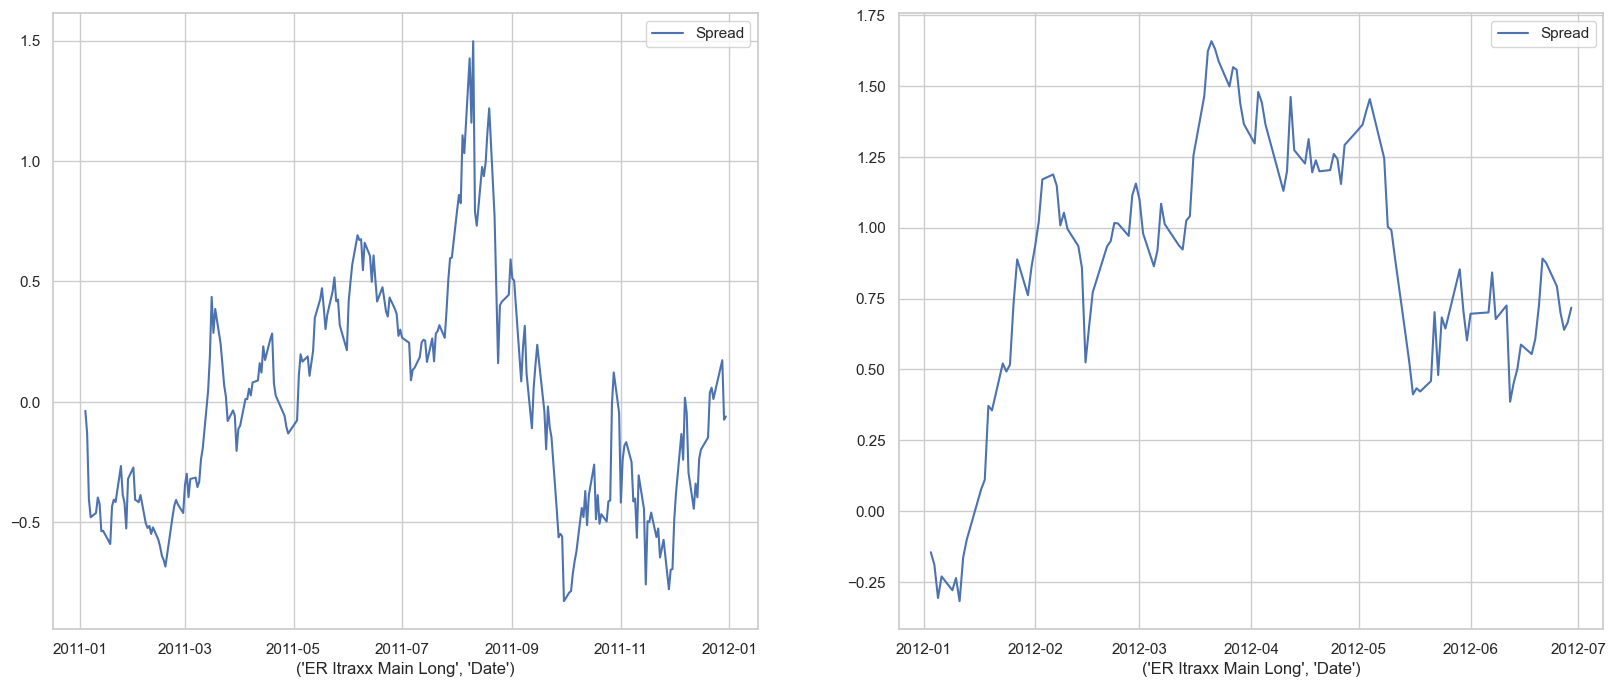

Start: 2011-07-01 00:00:00, end: 2013-01-01 00:00:00


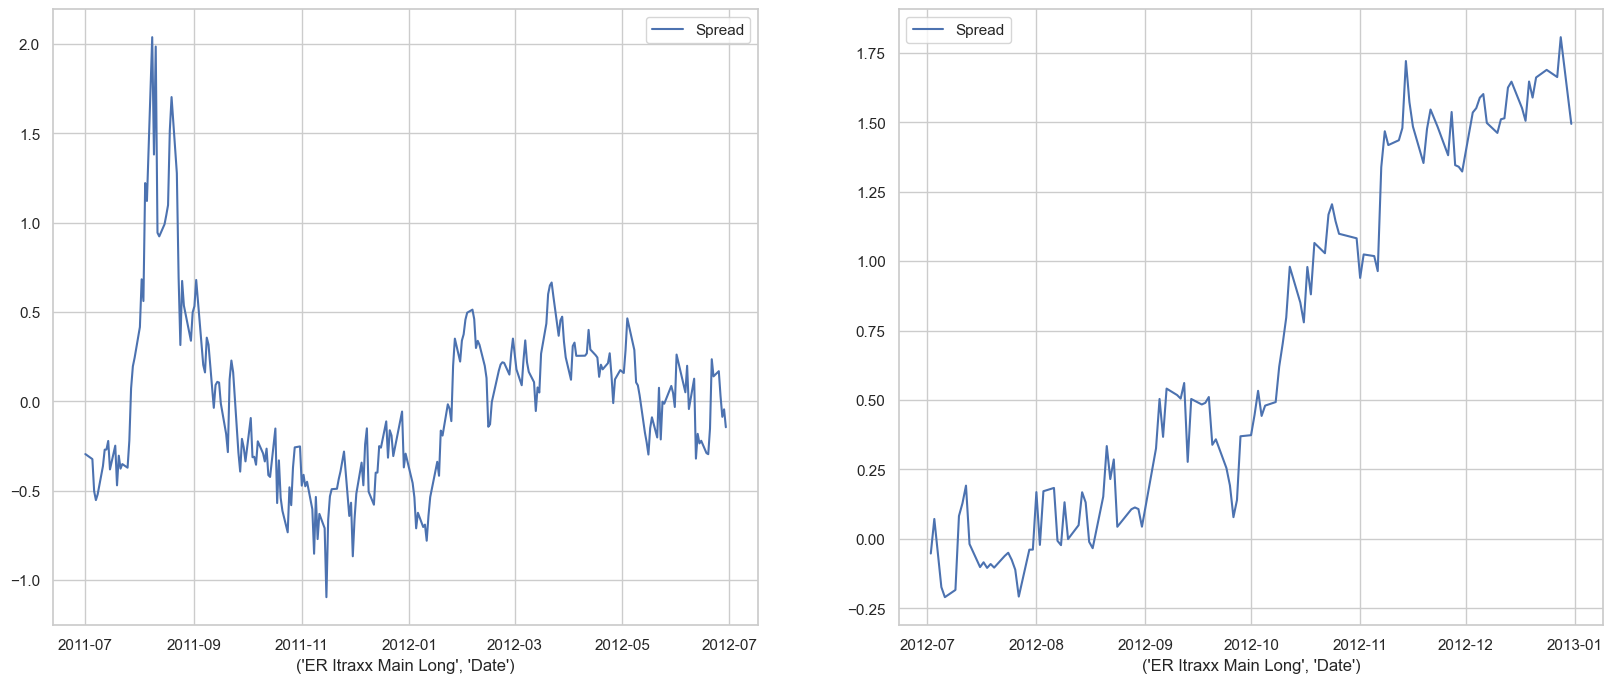

Start: 2012-01-01 00:00:00, end: 2013-07-01 00:00:00


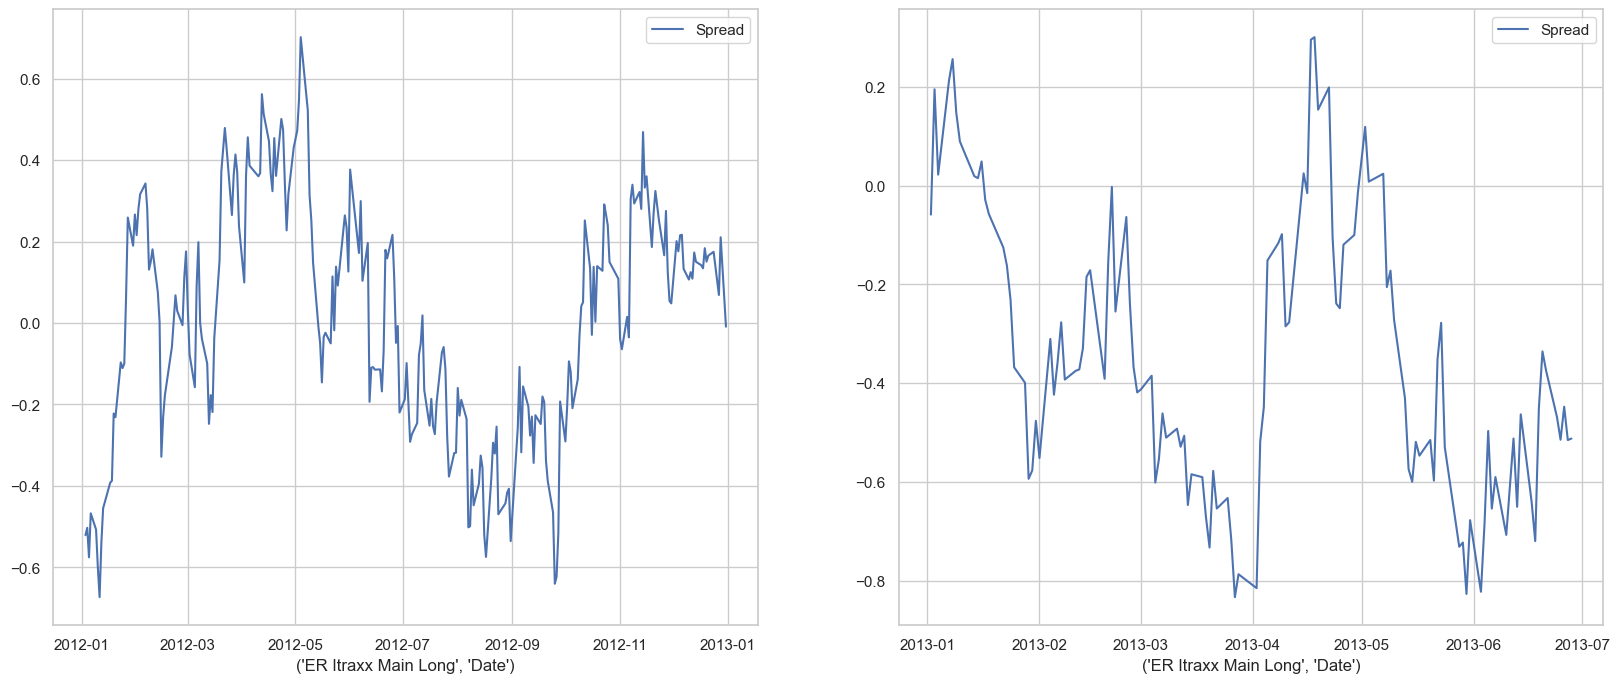

Start: 2012-07-01 00:00:00, end: 2014-01-01 00:00:00


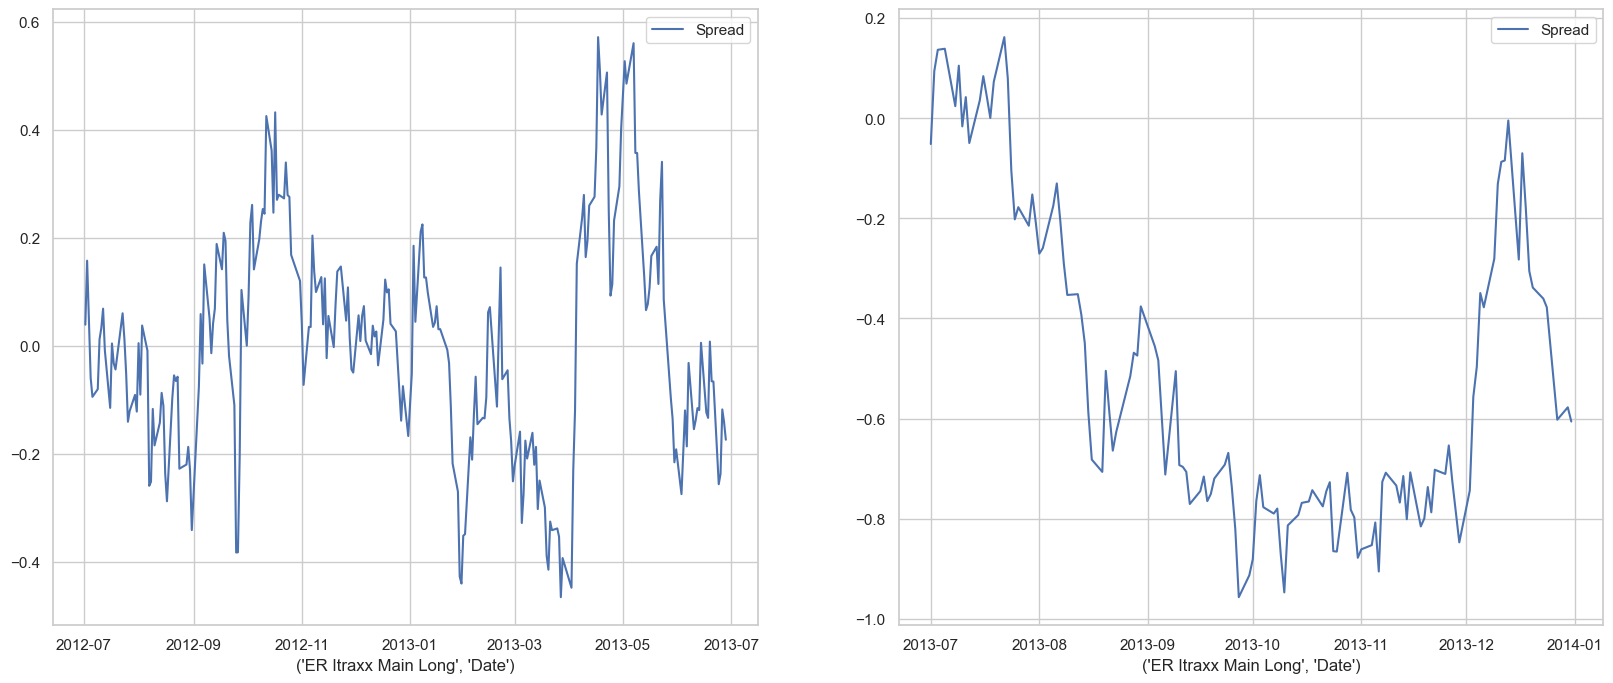

Start: 2013-01-01 00:00:00, end: 2014-07-01 00:00:00


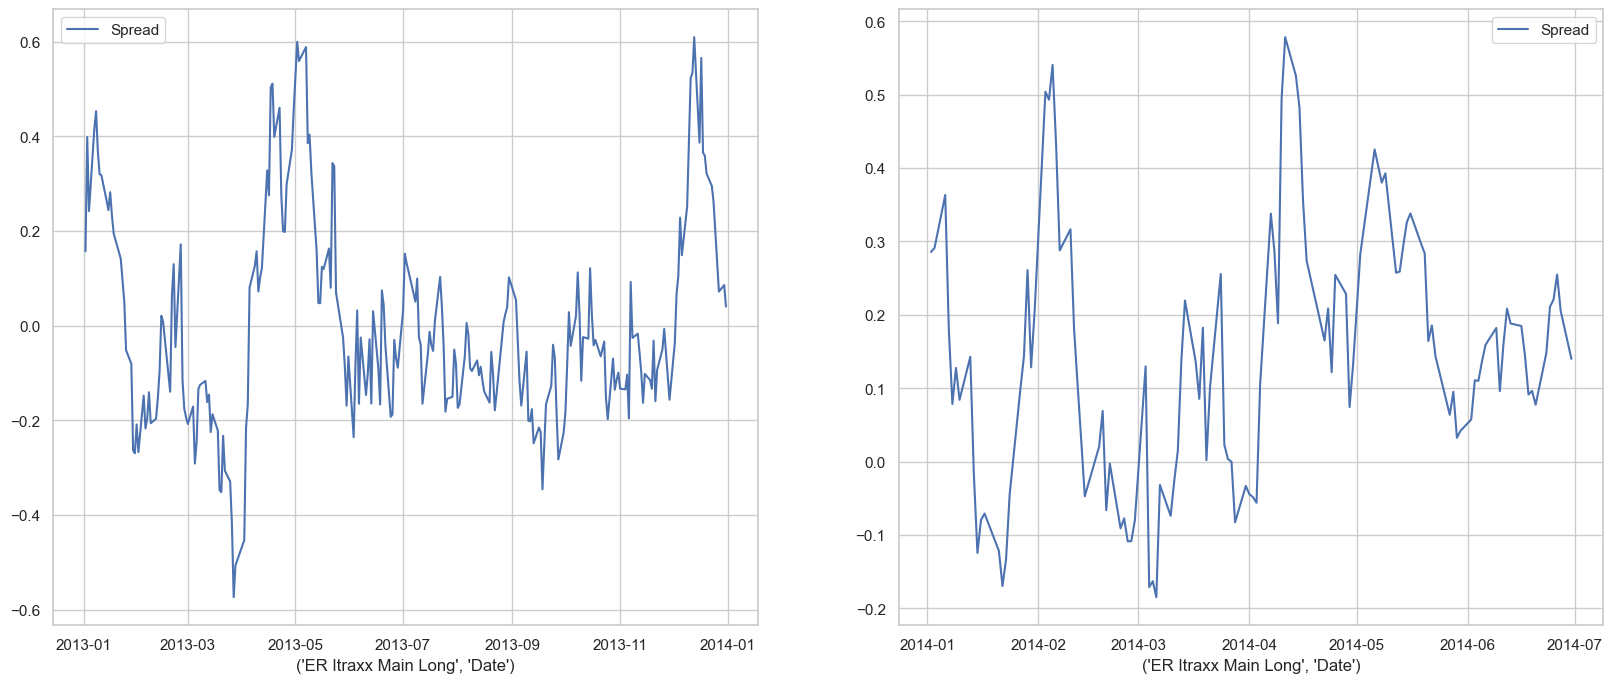

Start: 2013-07-01 00:00:00, end: 2015-01-01 00:00:00


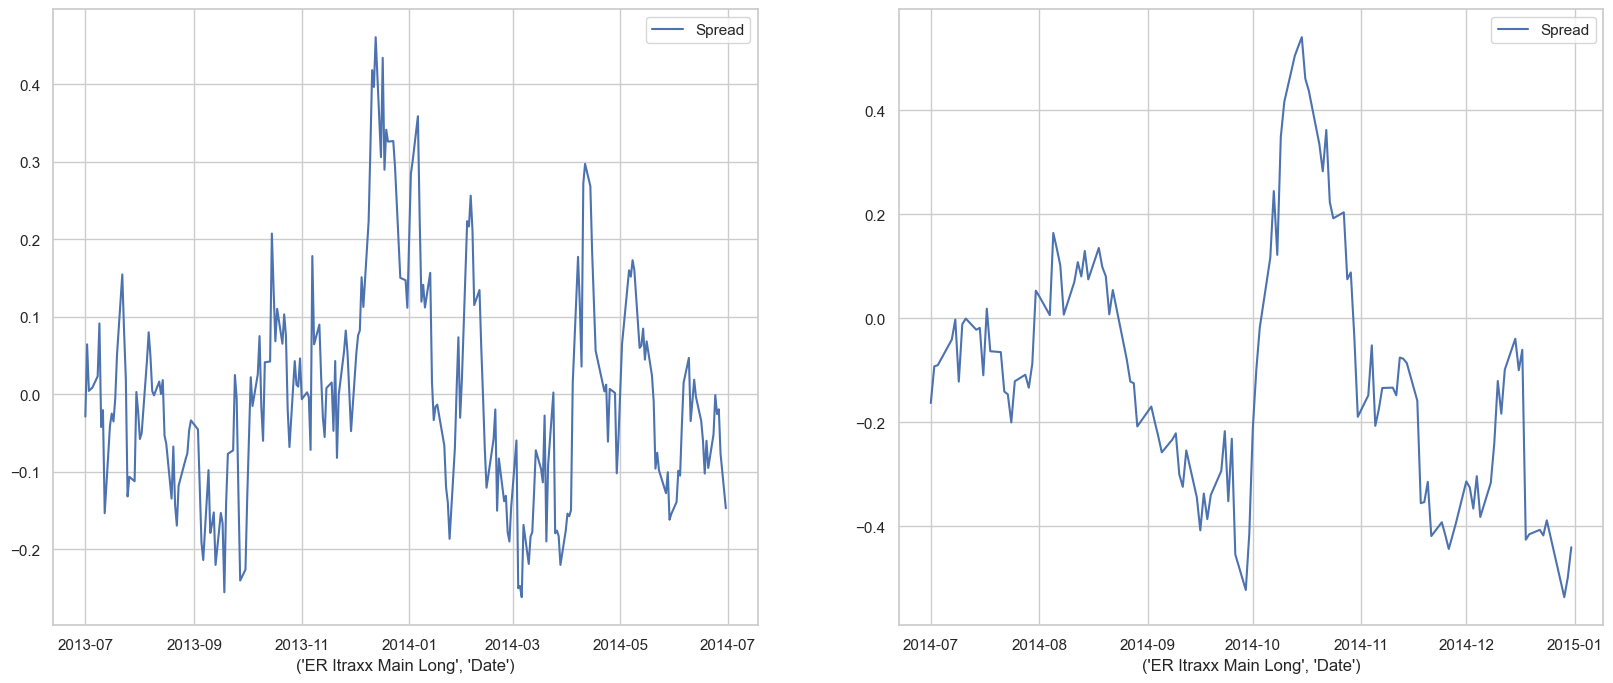

Start: 2014-01-01 00:00:00, end: 2015-07-01 00:00:00


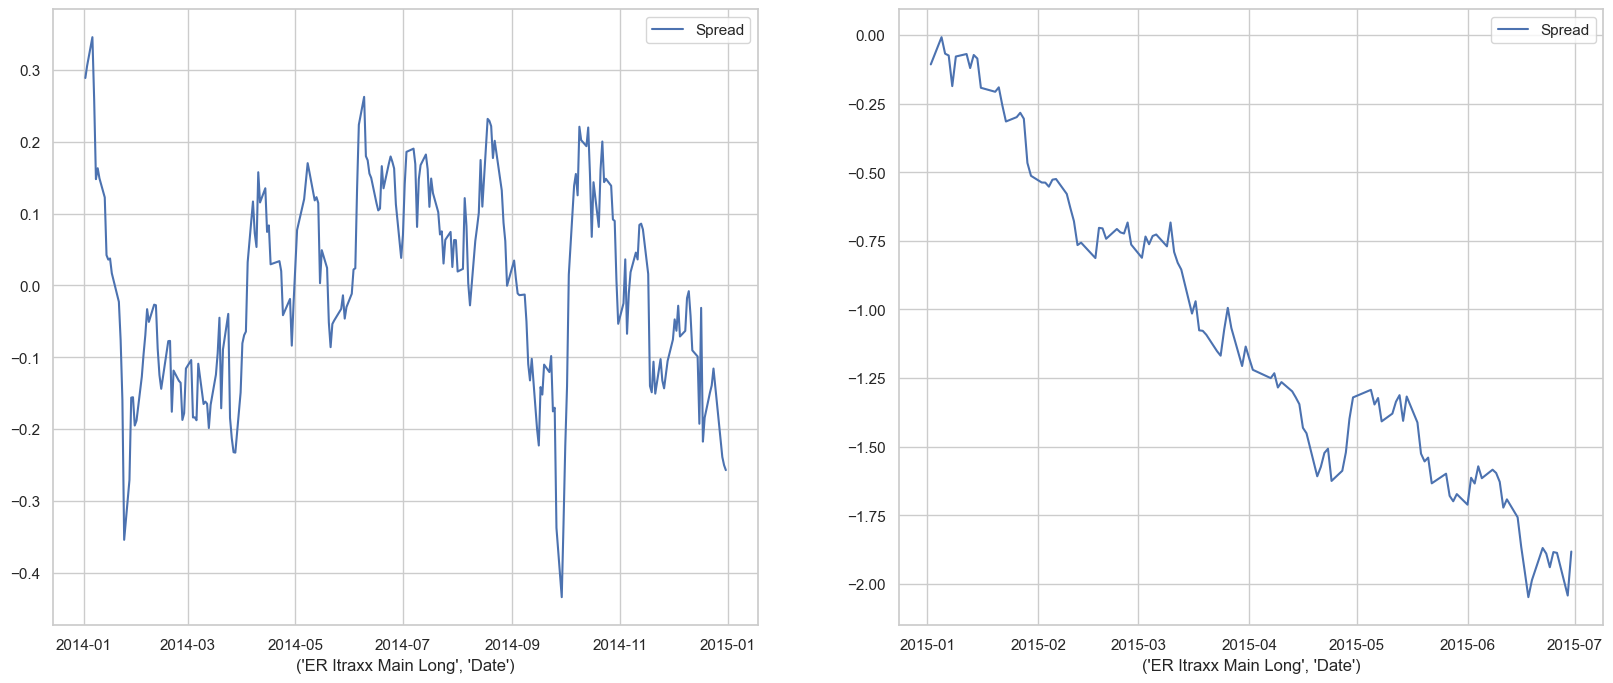

Start: 2014-07-01 00:00:00, end: 2016-01-01 00:00:00


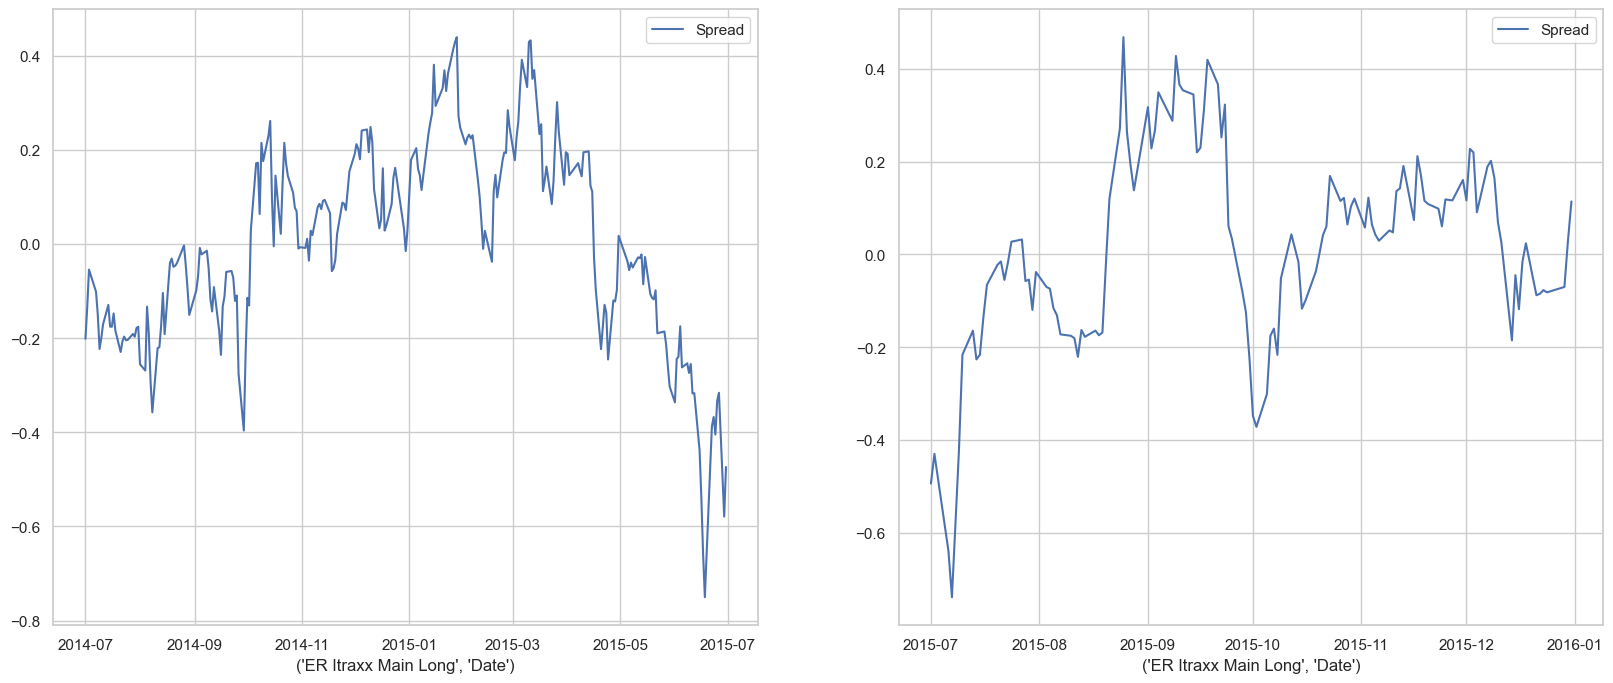

Start: 2015-01-01 00:00:00, end: 2016-07-01 00:00:00


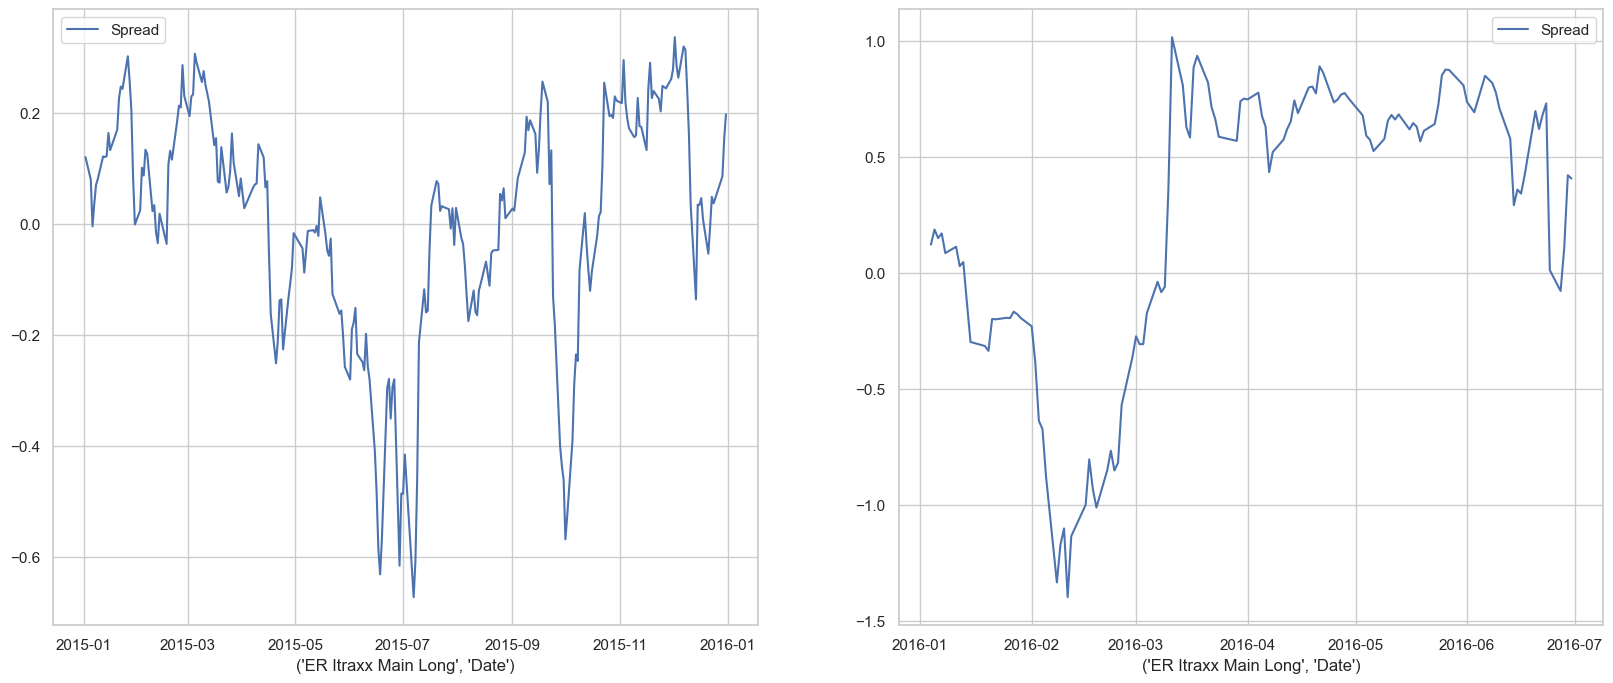

Start: 2015-07-01 00:00:00, end: 2017-01-01 00:00:00


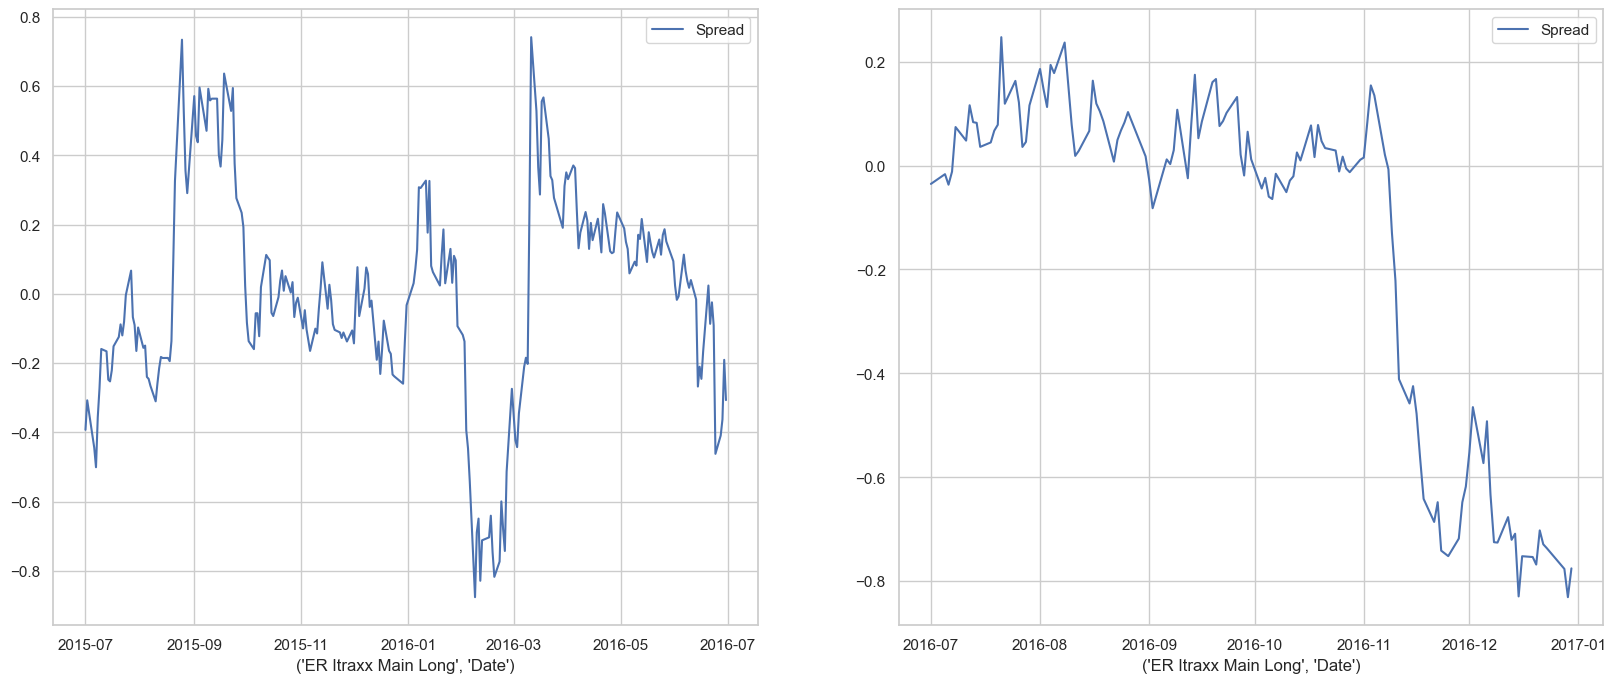

Start: 2016-01-01 00:00:00, end: 2017-07-01 00:00:00


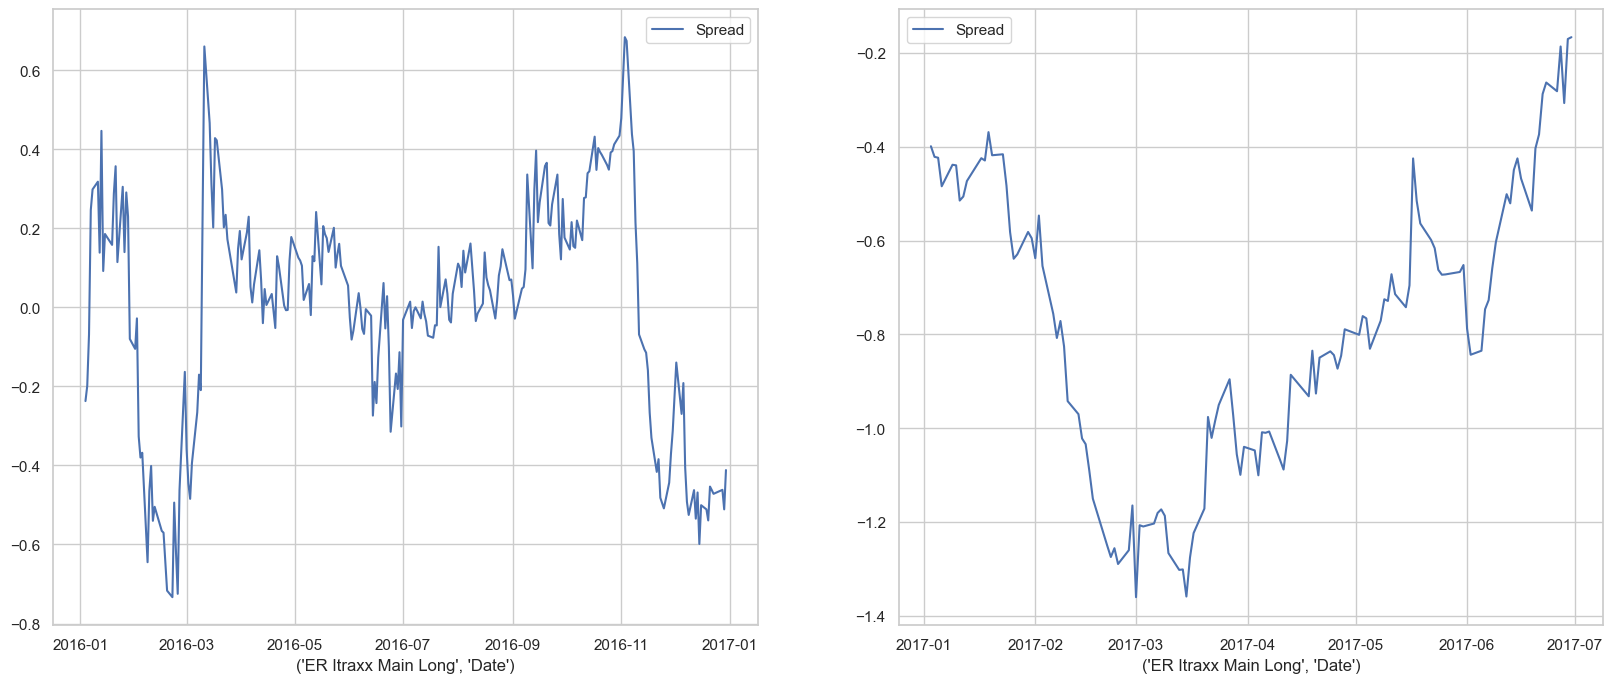

Start: 2016-07-01 00:00:00, end: 2018-01-01 00:00:00


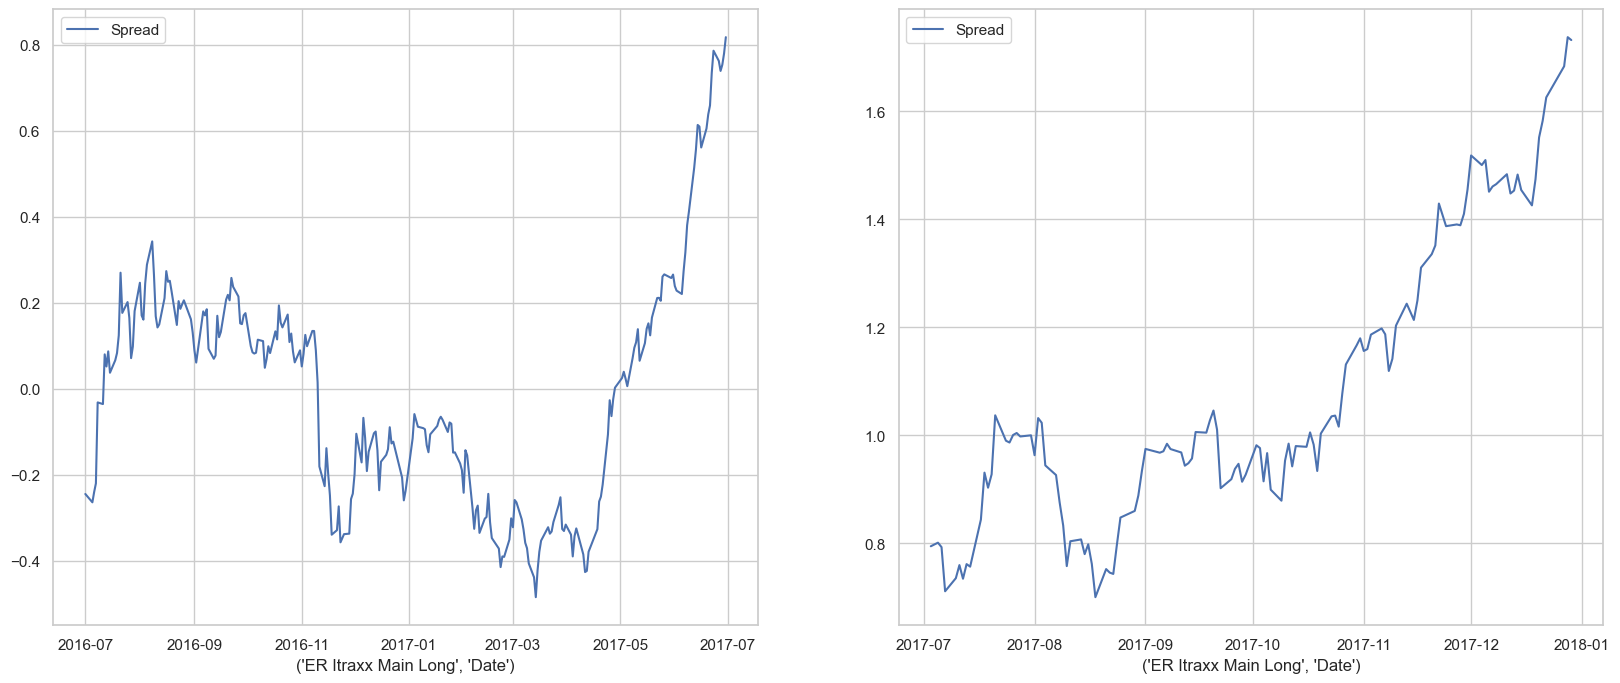

Start: 2017-01-01 00:00:00, end: 2018-07-01 00:00:00


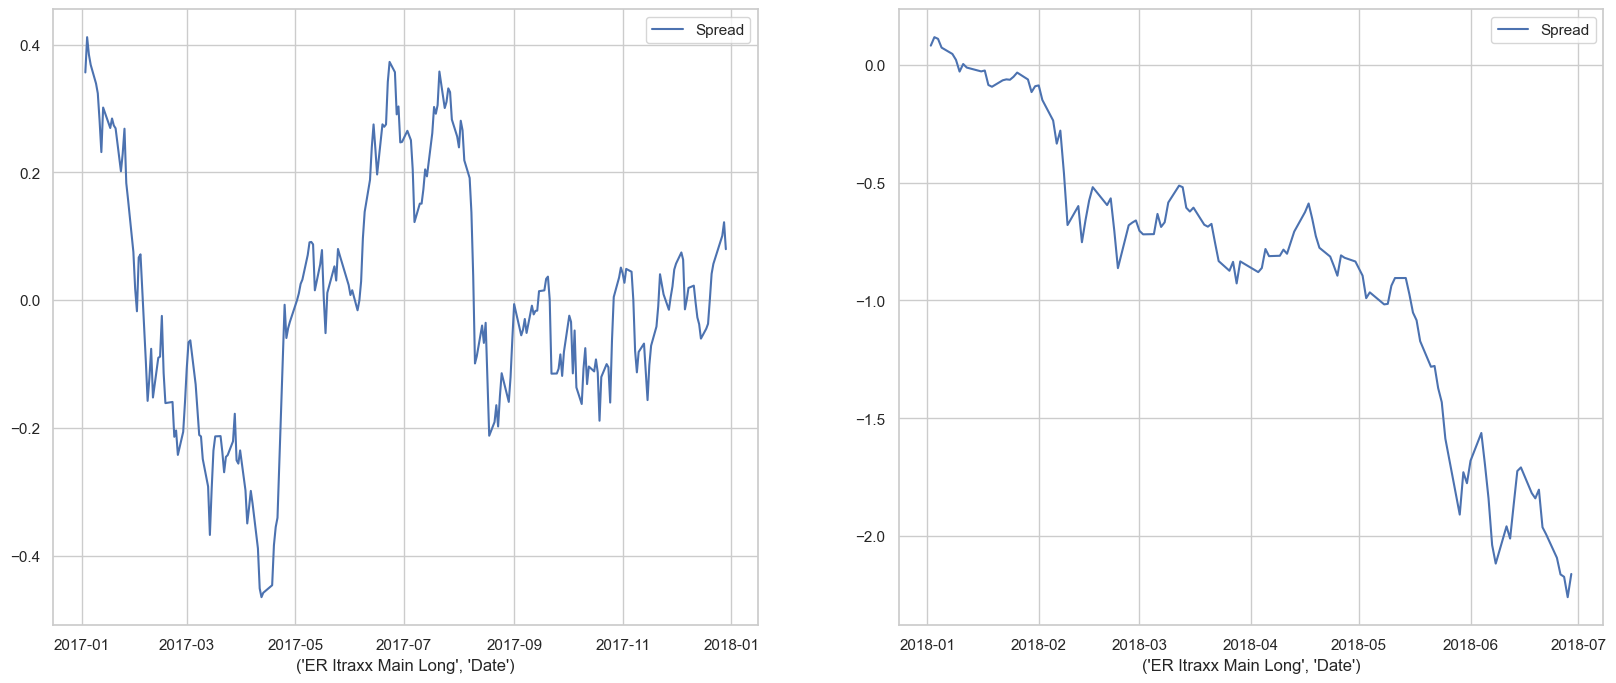

Start: 2017-07-01 00:00:00, end: 2019-01-01 00:00:00


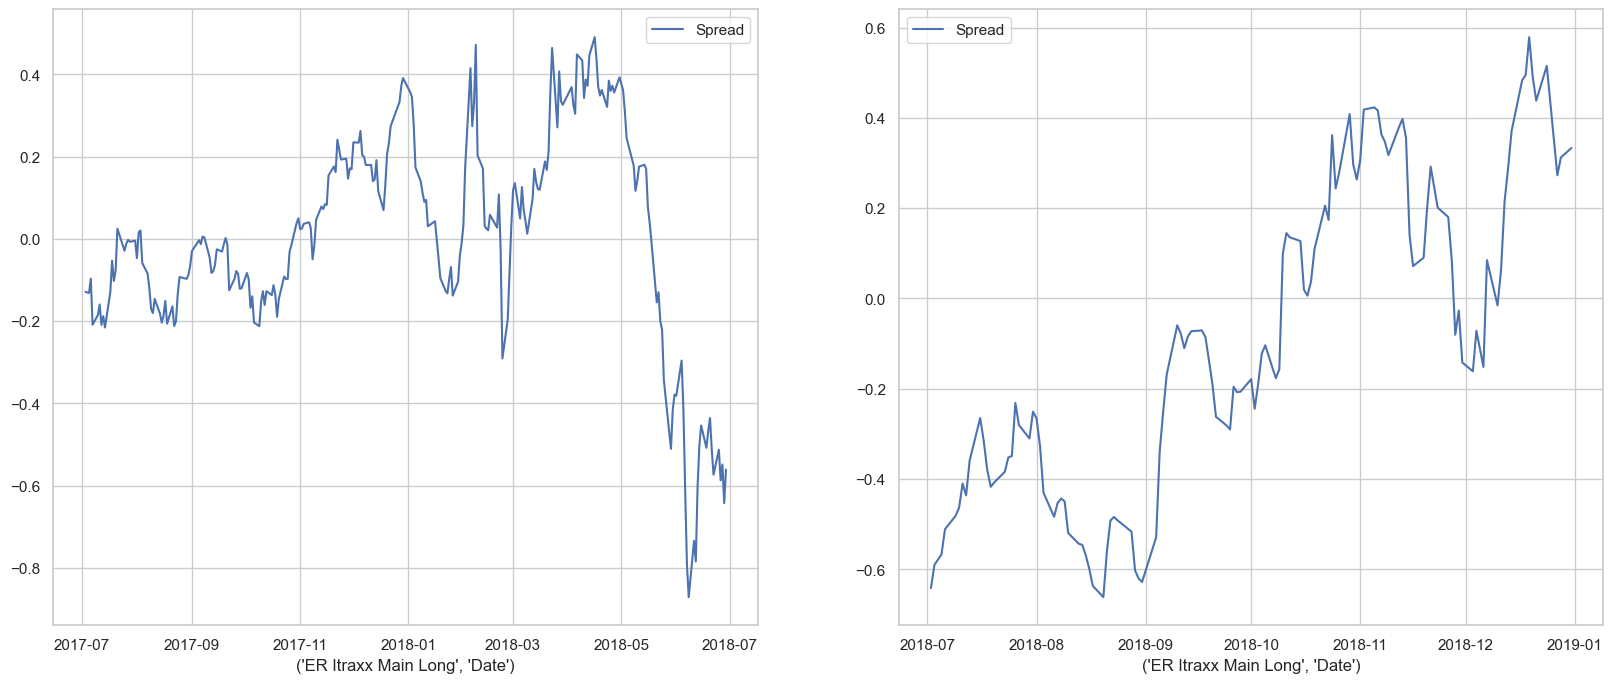

Start: 2018-01-01 00:00:00, end: 2019-07-01 00:00:00


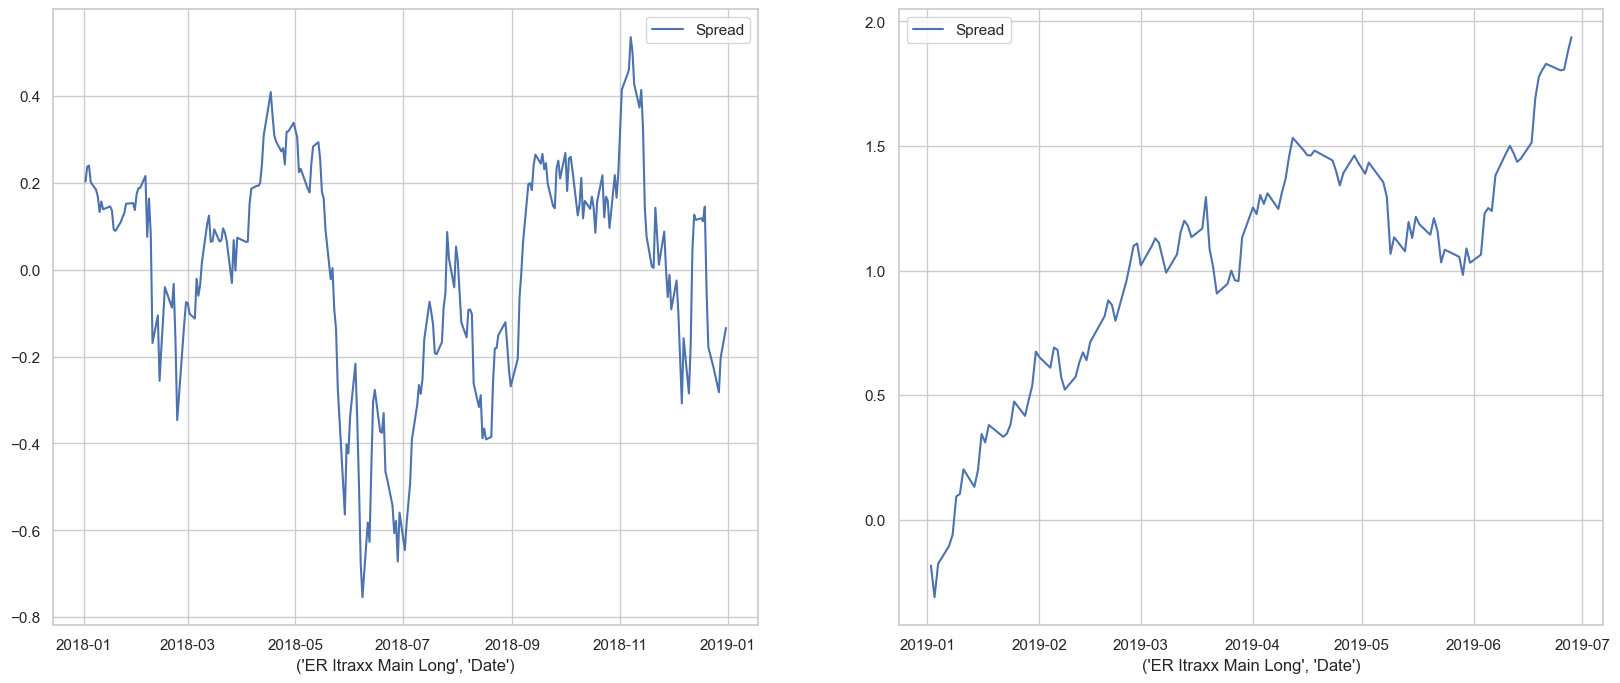

Start: 2018-07-01 00:00:00, end: 2020-01-01 00:00:00


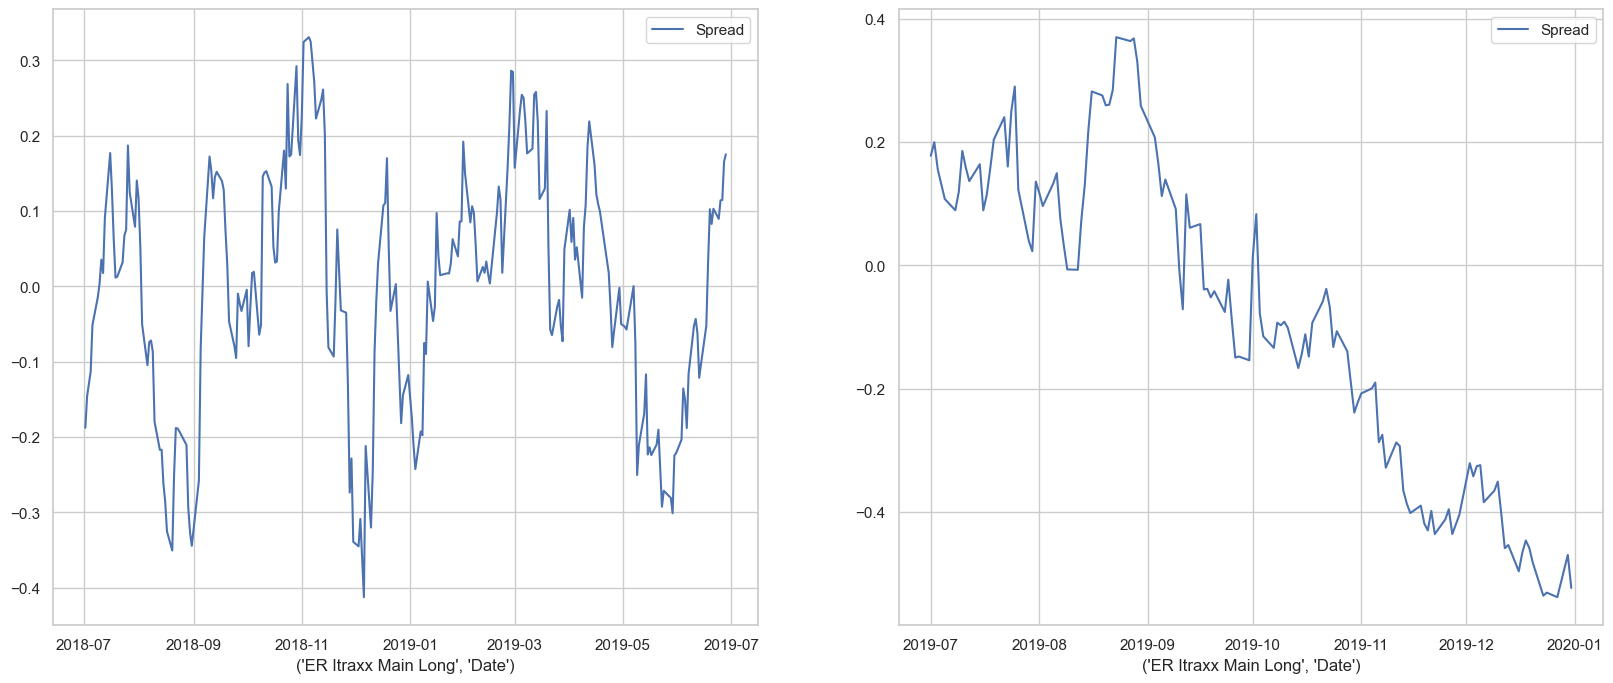

Start: 2019-01-01 00:00:00, end: 2020-07-01 00:00:00


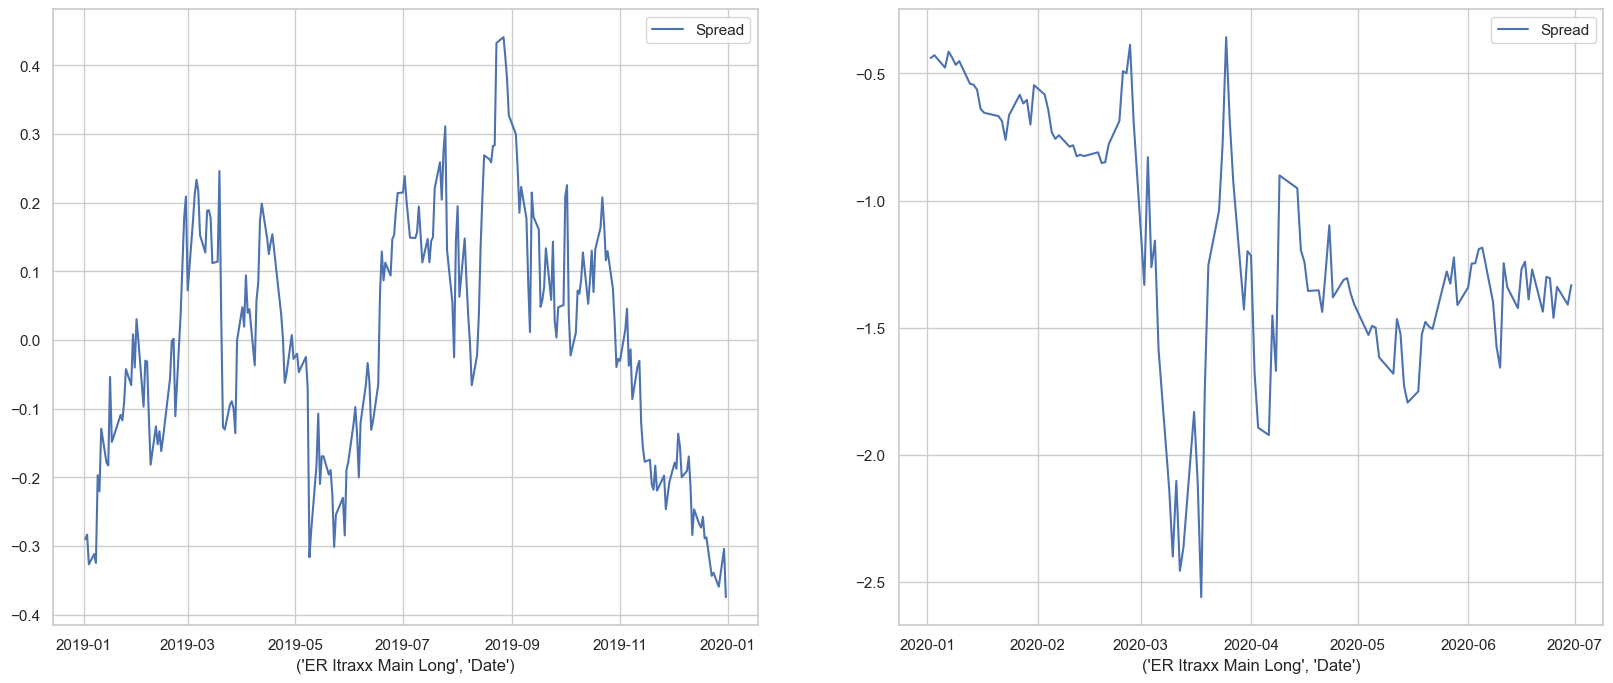

Start: 2019-07-01 00:00:00, end: 2021-01-01 00:00:00


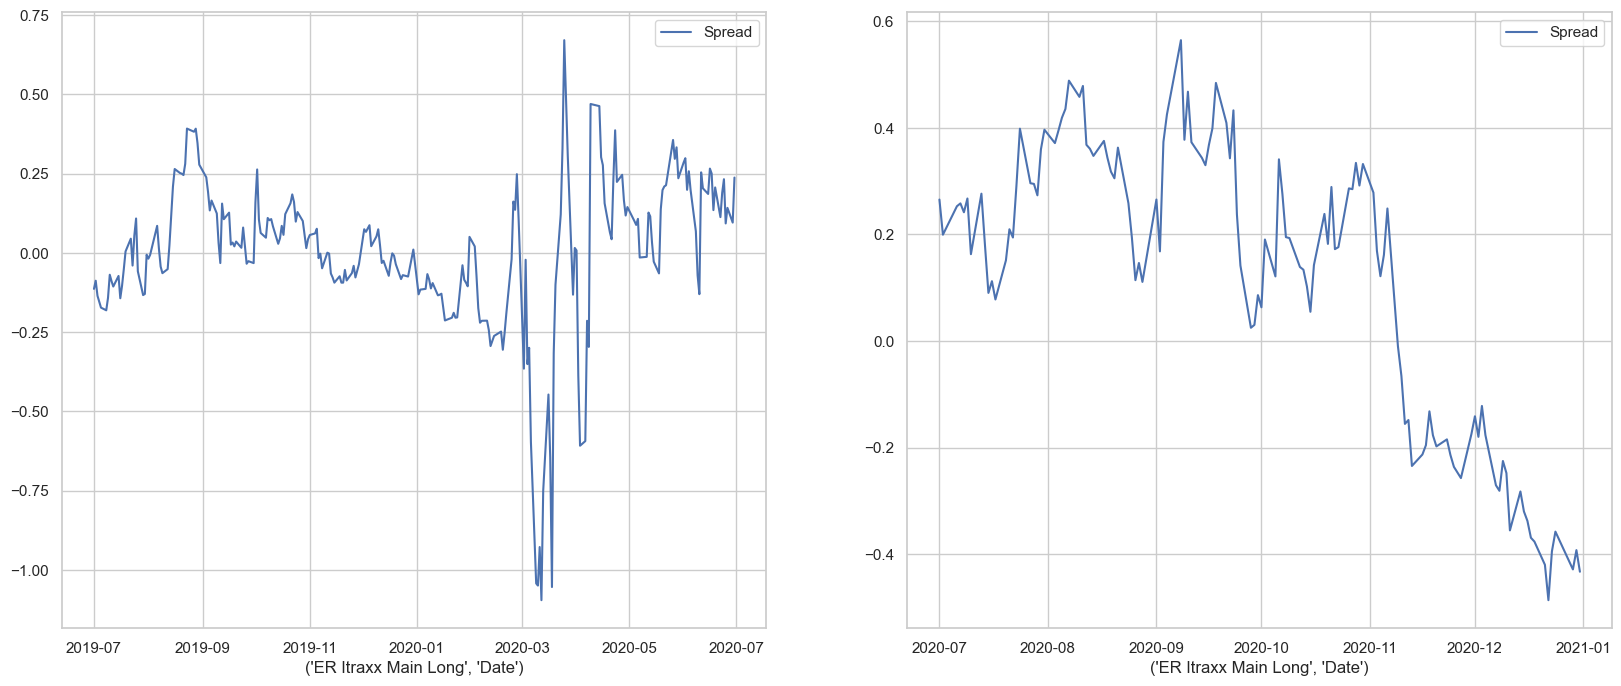

Start: 2020-01-01 00:00:00, end: 2021-07-01 00:00:00


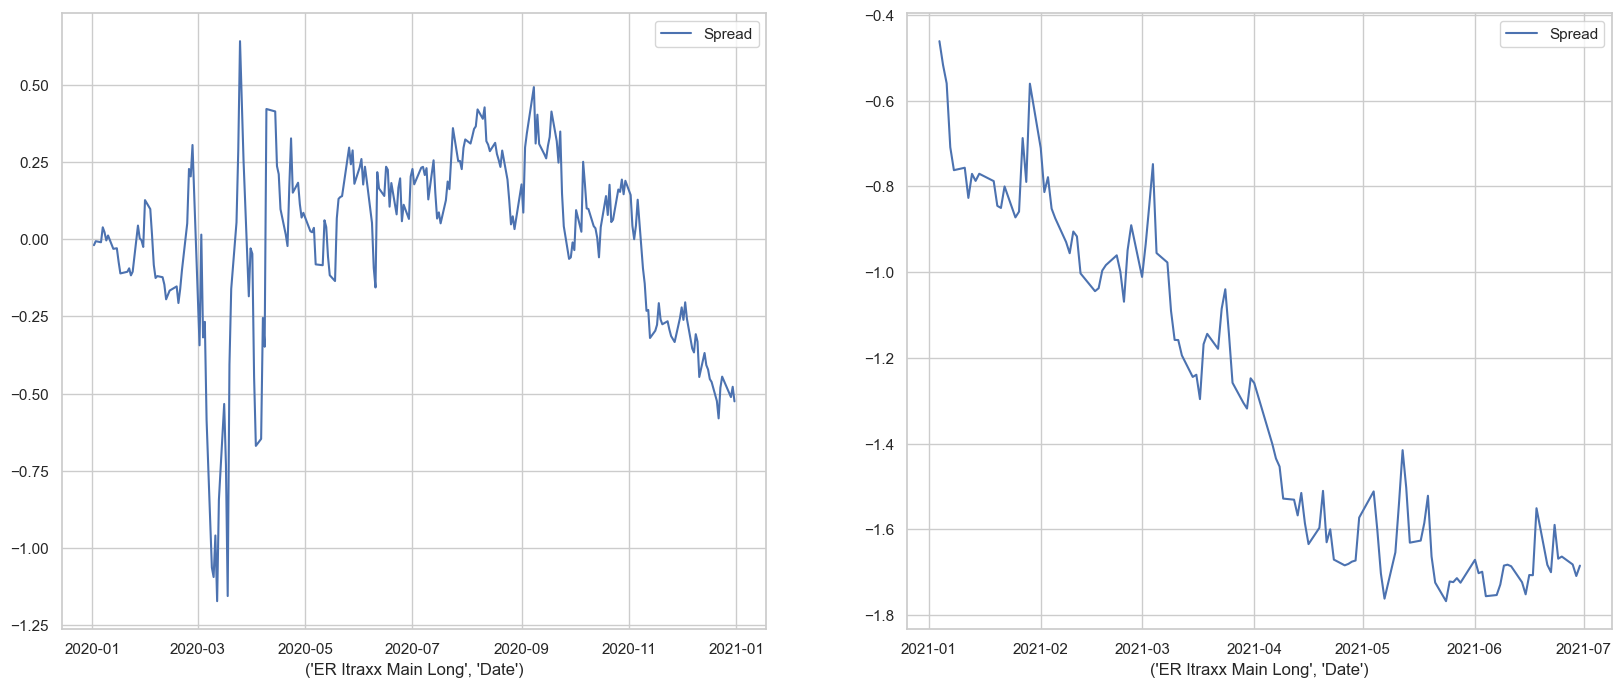

Start: 2020-07-01 00:00:00, end: 2022-01-01 00:00:00


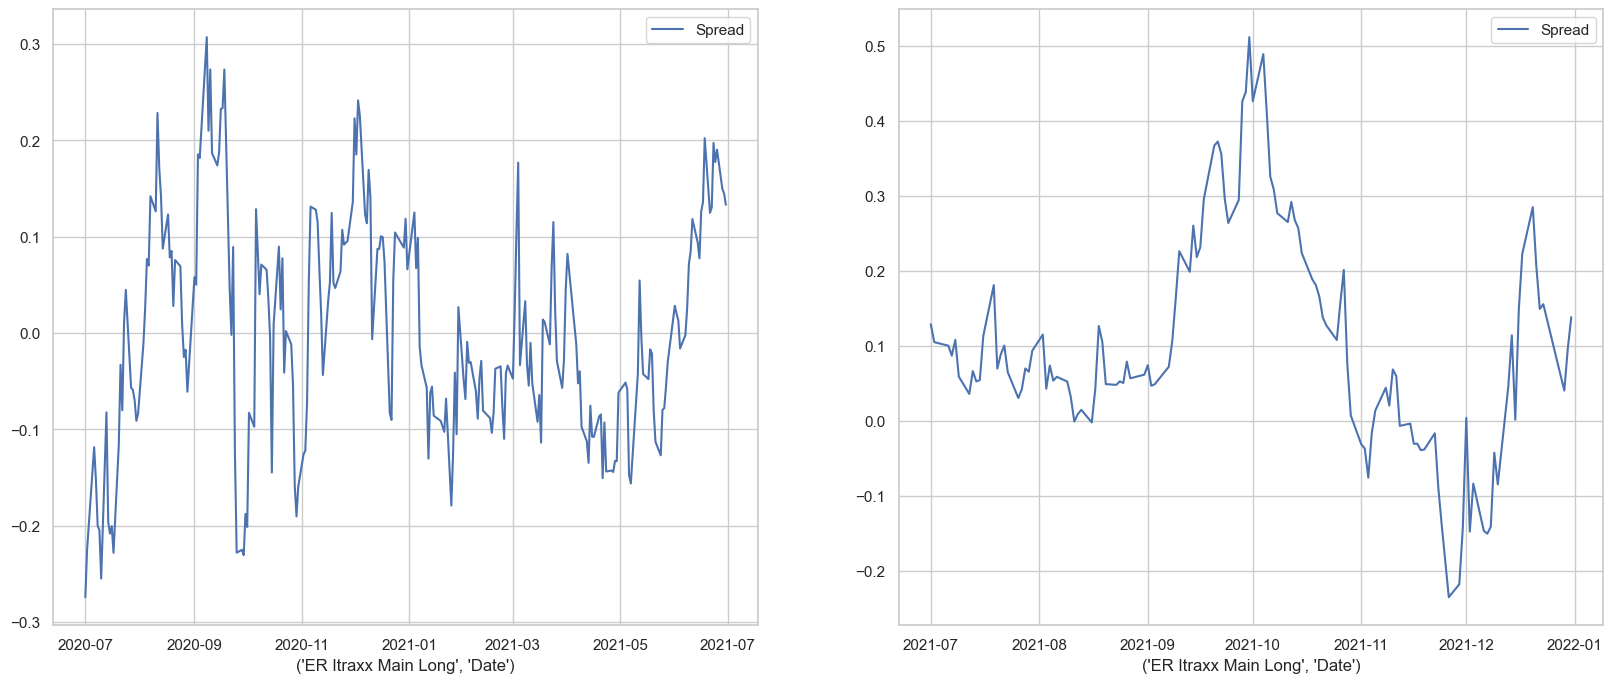

Start: 2021-01-01 00:00:00, end: 2022-07-01 00:00:00


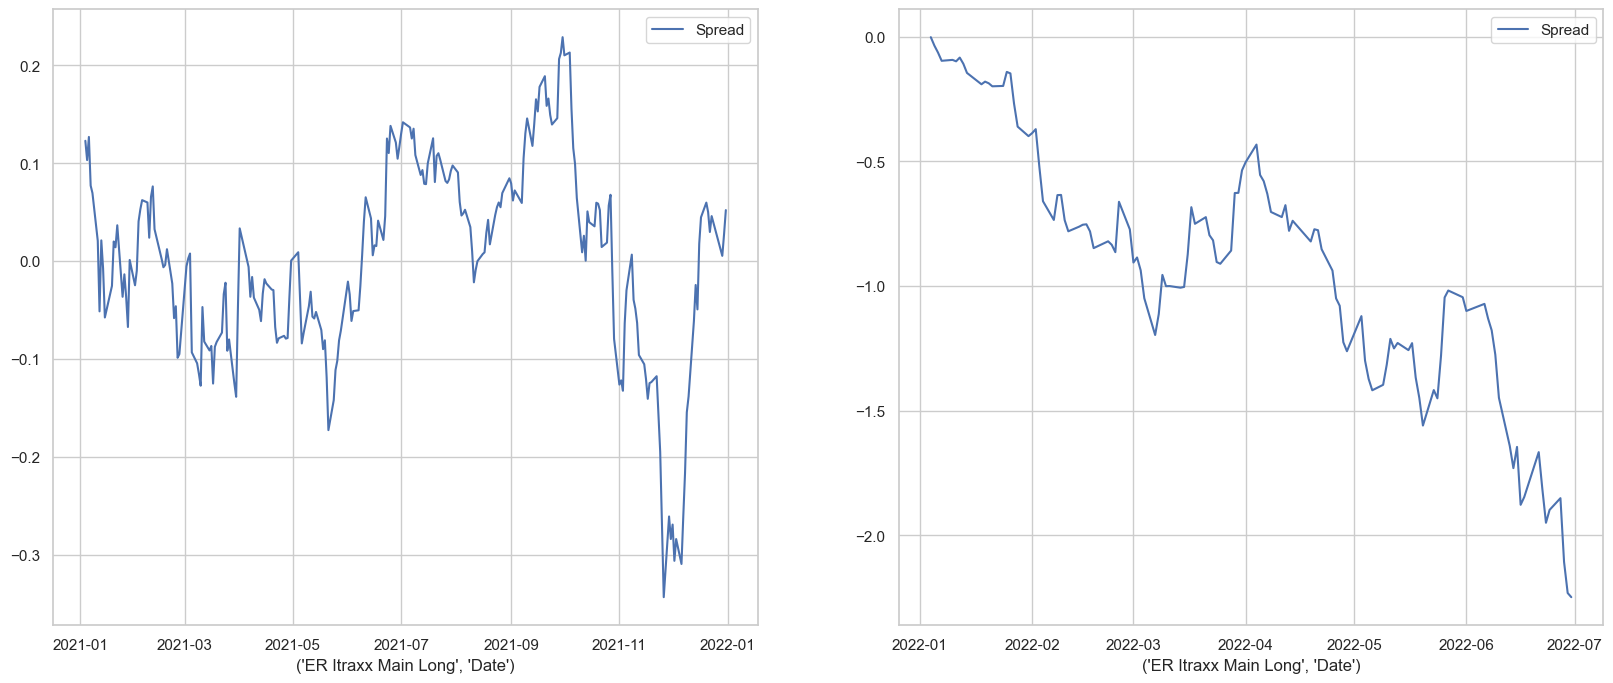

In [41]:
stocks = ['ER Itraxx Main Long', 'SPX', 'SX5E']

formation_per = 12
trading_per = 6
unit = 'month'

start_formation_date = datetime.datetime(2007, 7, 1)
end_formation_date = _next_date(start_formation_date, period=formation_per, unit=unit)
trading_end = _next_date(end_formation_date, period=trading_per, unit=unit)
last_date = max(data[idx['SPX', 'Date']])

results = {}

while trading_end < last_date:
    print(f'Start: {start_formation_date}, end: {trading_end}') 
    tmp, dates = _prepare_data(data, stocks, start_formation_date, trading_end)
    
    mod = sm.OLS(tmp.loc[dates<end_formation_date,'ER Itraxx Main Long'],
                 exog=tmp.loc[dates<end_formation_date].drop(columns='ER Itraxx Main Long'))
    res = mod.fit()
    k = str(start_formation_date).split(' ')[0]+' - '+str(end_formation_date).split(' ')[0]
    results[k] = {'params': res.params, 'rsquared': res.rsquared}
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
    sns.lineplot(y=tmp[dates<end_formation_date]['ER Itraxx Main Long']-tmp[dates<end_formation_date].drop(columns='ER Itraxx Main Long')@res.params,
            x=dates[dates<end_formation_date],label='Spread', ax=ax[0])
    sns.lineplot(y=tmp[dates>=end_formation_date]['ER Itraxx Main Long']-tmp[dates>=end_formation_date].drop(columns='ER Itraxx Main Long')@res.params,
            x=dates[dates>=end_formation_date],label='Spread', ax=ax[1])
    plt.show()
    
    end_formation_date = trading_end
    start_formation_date = _next_date(end_formation_date, period=-formation_per, unit=unit)
    trading_end = _next_date(trading_end, period=trading_per, unit=unit)
    

It seems that we observe strong mean-reversion during the formation period, but not during the trading.

# <a name=fourth> </a>Trading with the O-U model

 * Inpired by the following [article](https://cs229.stanford.edu/proj2012/ChenRenLu-MachineLearningInPairsTradingStrategies.pdf) (1)
 
 * Based on the [article](https://math.nyu.edu/~avellane/AvellanedaLeeStatArb071108.pdf) (2)
 
 * With the help of the [medium post](https://medium.com/@financialnoob/pairs-trading-with-ornstein-uhlenbeck-process-part-1-cf7f9b532f5d) (3)

Assuming that two stocks follow:

$$
\frac{dS_1(t)}{S_q(t)} = \beta \frac{dS_2(t)}{S_2(t)} + dX(t)
$$

where $dX(t)$ is their mean-reverting spread. The O-U model of spread:

$$
dX(t) = \theta(\mu-X(t))dt + \sigma dW(t)
$$

$$
\Rightarrow X(t_0+\Delta t) = e^{-\theta \Delta t} X(t_0) + (1-e^{-\theta \Delta t}) \mu + \sigma \int_{t_0}^{t_0+\Delta t} e^{-\theta(t_0 +\Delta t - s} dW(s)
$$

In our procedure we firstly regress returns:

$$
R_t^1 = \beta_0 R_t^2 + \varepsilon_t, t=t_1,\dots,t_{60}
$$

with porfolio weights $(1/(\beta+1), \beta/(1+\beta))$. Then we use the sum of residuals to obtain the discrete version of spread $X_k$:

$$
X_k = \sum_{j=t_1}^k \varepsilon_j, k=t_1,\dots,t_{60}
$$

and use then AR(1) linear regression:

$$
X_{k+1} = a + bX_k + \zeta_{k+1}, k=t_1,\dots, t_{60}
$$

from which we find parameters of integrated O-U process:

$$
\theta = -\log(b)\times252 \\
\mu = a/(1-b)\\
\sigma = \sqrt{\frac{Var(\zeta) 2 \theta}{1-b^2}}
$$

which we use to find so-called s-score for 

### ER Itraxx Main Long vs SPX & SX5E

In [13]:
data = pd.read_excel('data/data_prepared.xlsx', index_col=0, header=[0,1])

In [14]:
data

SPX                        ER Itraxx Main Long             \
           Date Last Price      Volume                Date Last Price   
0    2007-03-20    1410.94  1182479104          2007-03-20   100.0000   
1    2007-03-21    1435.04  1399847424          2007-03-21   100.0287   
2    2007-03-22    1434.54  1286669440          2007-03-22   100.0833   
3    2007-03-23    1436.11  1122459392          2007-03-23   100.1090   
4    2007-03-26    1437.50  1187999488          2007-03-26   100.1063   
...         ...        ...         ...                 ...        ...   
3902 2022-09-16    3873.33  2094243200          2022-09-16   113.7744   
3903 2022-09-19    3899.89   609422592                 NaT        NaN   
3904 2022-09-20    3855.93   606929216          2022-09-20   113.6542   
3905 2022-09-21    3789.93   650767104          2022-09-21   113.5834   
3906 2022-09-22    3778.47           0          2022-09-22   113.3897   

     ER Itraxx Xover Long            ER CDX IG Long                  SX5E  \
                     Date Last Price           Date Last Price       Date   
0              2007-03-20   100.0000     2007-03-20   100.0000 2007-03-20   
1              2007-03-21   100.2951     2007-03-21   100.0850 2007-03-21   
2              2007-03-22   100.8037     2007-03-22   100.1147 2007-03-22   
3              2007-03-23   100.8924     2007-03-23   100.1108 2007-03-23   
4              2007-03-26   100.7493     2007-03-26   100.0683 2007-03-26   
...                   ...        ...            ...        ...        ...   
3902           2022-09-16   198.5412     2022-09-16   111.0792 2022-09-16   
3903                  NaT        NaN     2022-09-19   111.2009 2022-09-19   
3904           2022-09-20   197.7231     2022-09-20   111.0292 2022-09-20   
3905           2022-09-21   197.6984     2022-09-21   110.9141 2022-09-21   
3906           2022-09-22   196.4054     2022-09-22        NaN 2022-09-22   

                               
     Last Price        Volume  
0     4079.5200  9.134466e+08  
1     4078.2900  8.624504e+08  
2     4170.0801  1.174437e+09  
3     4191.5801  9.219071e+08  
4     4142.1099  9.893587e+08  
...         ...           ...  
3902  3500.4099  6.839488e+08  
3903  3499.4900  2.459344e+08  
3904  3467.0901  3.551371e+08  
3905  3491.8701  2.827494e+08  
3906  3427.1399           NaN  

[3907 rows x 12 columns]

In [15]:
itraxx = 'ER Itraxx Main Long'
stocks = ['SPX', 'SX5E']

In [16]:
tmp = data.loc[:, idx[[itraxx] + stocks, :]].dropna(how='any', axis=0)
tmp.reset_index(drop=True, inplace=True)
dates = tmp.loc[:, idx['SPX', 'Date']]
tmp = tmp.loc[:, idx[[itraxx] + stocks,'Last Price']]
tmp.columns = [x[0] for x in tmp.columns]
tmp.index = dates

We transfrom our prices to returns

In [17]:
returns = tmp.pct_change().dropna()
returns.head()

ER Itraxx Main Long       SPX      SX5E
(SPX, Date)                                         
2007-03-21              0.000287  0.017081 -0.000302
2007-03-22              0.000546 -0.000348  0.022507
2007-03-23              0.000257  0.001094  0.005156
2007-03-26             -0.000027  0.000968 -0.011802
2007-03-27             -0.000081 -0.006184  0.002776

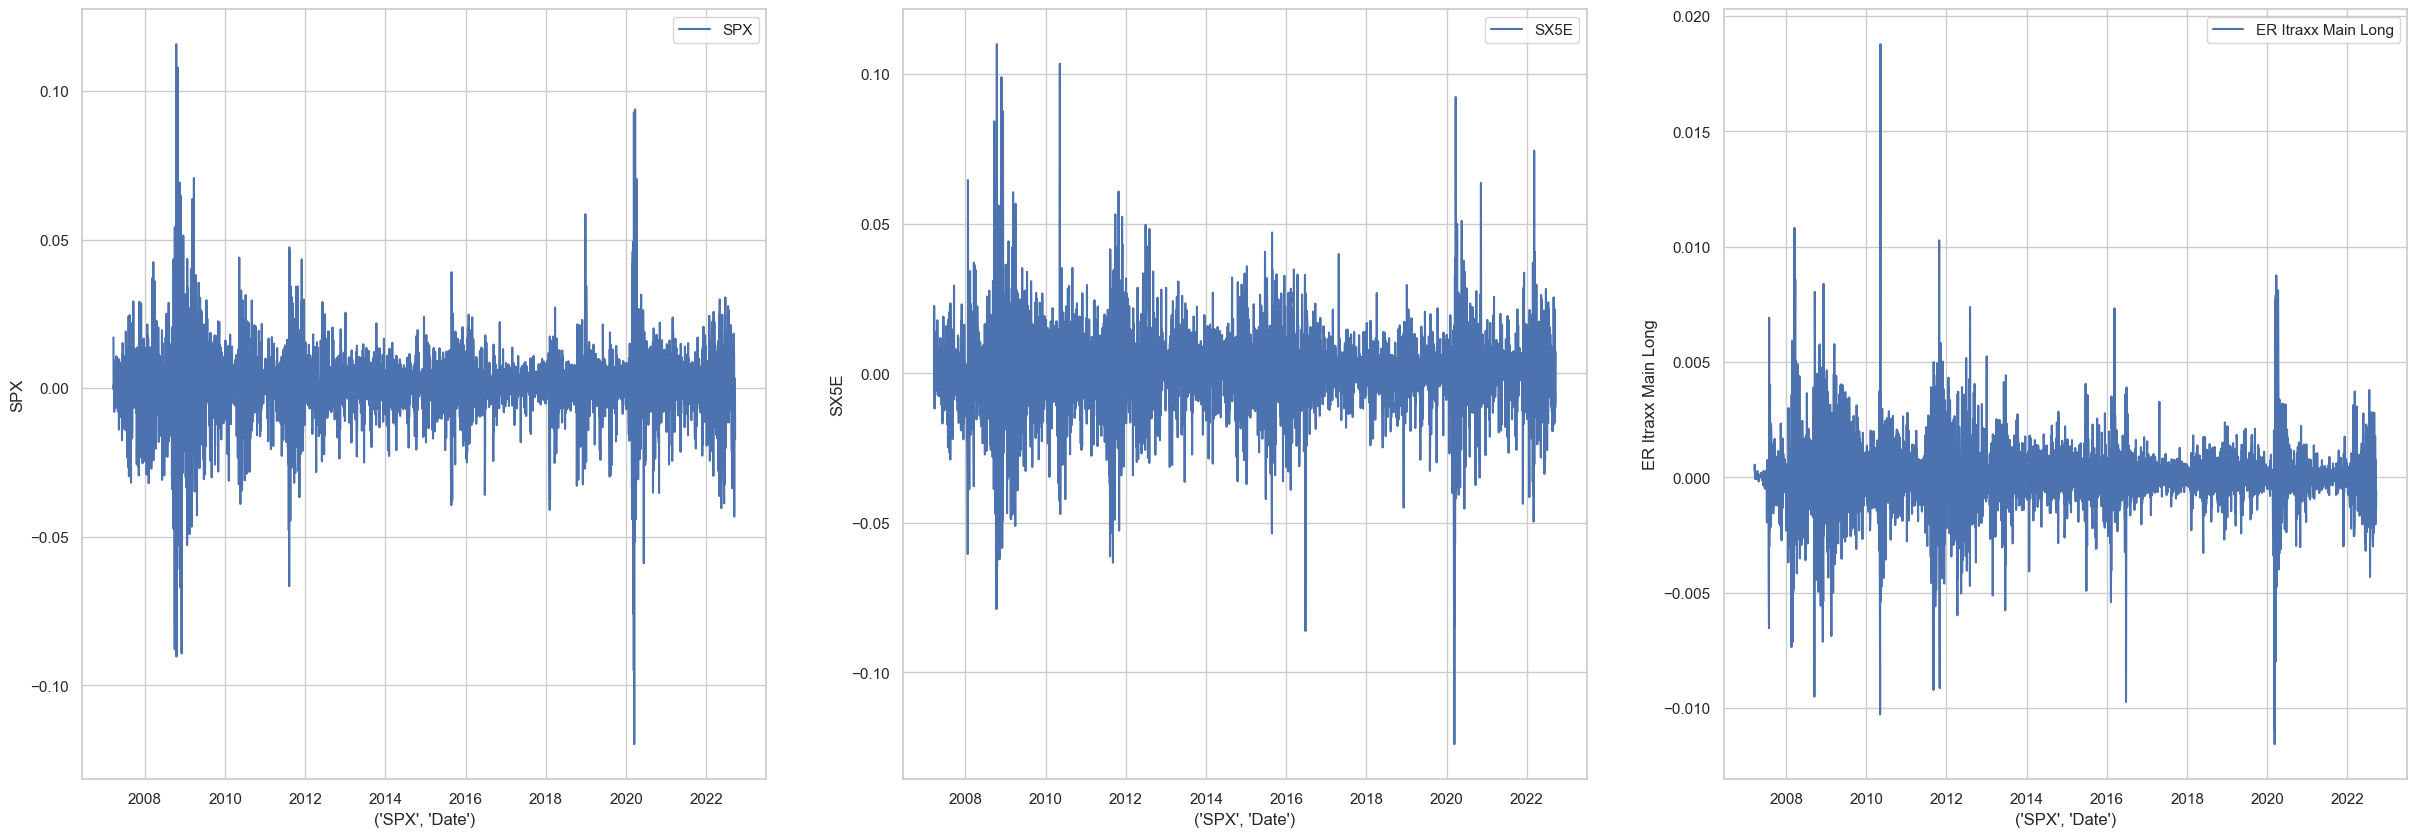

In [18]:
fix, ax = plt.subplots(1,len(stocks)+1, figsize=(10*(len(stocks)+1),10))
for i in range(len(stocks)):
    sns.lineplot(returns[stocks[i]], ax=ax[i], label=stocks[i])
sns.lineplot(returns[itraxx], ax=ax[-1], label=itraxx)
plt.show()

Following the article (1), we set 60 days formation period and regress each stock on our index in the following models (i.e. we develop two parallel strategies):

In [19]:
WIND = 60

s_scores = pd.DataFrame(index=returns.index[WIND-1:], columns=stocks)
betas = pd.DataFrame(index=returns.index[WIND-1:], columns=stocks)

for i, date in enumerate(returns.index[WIND-1:]):
    tmp_train = returns.loc[:date]
    tmp_train = tmp_train.iloc[-WIND:]
    # for some reason it works better with standardized returns for signal generation
    # borrowed from medium article
    tmp_train = (tmp_train - tmp_train.mean())/tmp_train.std()
    
    ou_params = pd.DataFrame(index=stocks,
                         columns=['a', 'b', 'Var(zeta)','theta', 'tau','mu', 'sigma', 'sigma_eq'])
    
    for stock in stocks:
        X = tmp_train[itraxx]
        X = sm.add_constant(X)
        y = tmp_train[stock]
        
        # first regression
        lr1 = sm.OLS(y, X)
        res1 = lr1.fit()
        beta = res1.params[itraxx]
        betas.loc[date, stock] = beta
        epsilon = (y - X@res1.params).values

        # second regression
        Xk = epsilon.cumsum()
        X = Xk[:-1] #lags
        X = sm.add_constant(X)
        y = Xk[1:]
        lr2 = sm.OLS(y, X)
        res2 = lr2.fit()
        a, b = res2.params
        dzeta = y-X@res2.params

        theta = -np.log(b)*252
        mu = a/(1-b)
        dzeta_var = np.var(dzeta)
        sigma = np.sqrt(dzeta_var*2*theta/(1-b**2))
        sigma_eq = np.sqrt(dzeta_var/(1-b**2))

        tau = 1/theta #speed of mean-reversion
        ou_params.loc[stock] = [a, b, dzeta_var, theta, tau, mu, sigma, sigma_eq]
    
    ou_params['m_bar'] = (ou_params['a']/(1 - ou_params['b']) - ou_params['a'].mean()/(1-ou_params['b'].mean()))
    ou_params['s'] = -ou_params['m_bar'] / ou_params['sigma_eq']
    s_scores.loc[date] = ou_params['s']

In [20]:
betas.head(10)

SPX      SX5E
(SPX, Date)                    
2007-06-19   0.128206  0.515042
2007-06-20   0.124167  0.514432
2007-06-21   0.086489  0.478161
2007-06-22   0.179617   0.45941
2007-06-25   0.194004  0.454495
2007-06-26   0.186586  0.453126
2007-06-27   0.142629  0.458521
2007-06-28   0.141274  0.465671
2007-06-29   0.141409  0.461485
2007-07-02   0.063141  0.462732

In [21]:
s_scores.head()

SPX      SX5E
(SPX, Date)                    
2007-06-19  -0.083606  0.111918
2007-06-20  -0.162003   0.23576
2007-06-21  -0.142772  0.203383
2007-06-22  -0.265881  0.416427
2007-06-25  -0.171699  0.322735

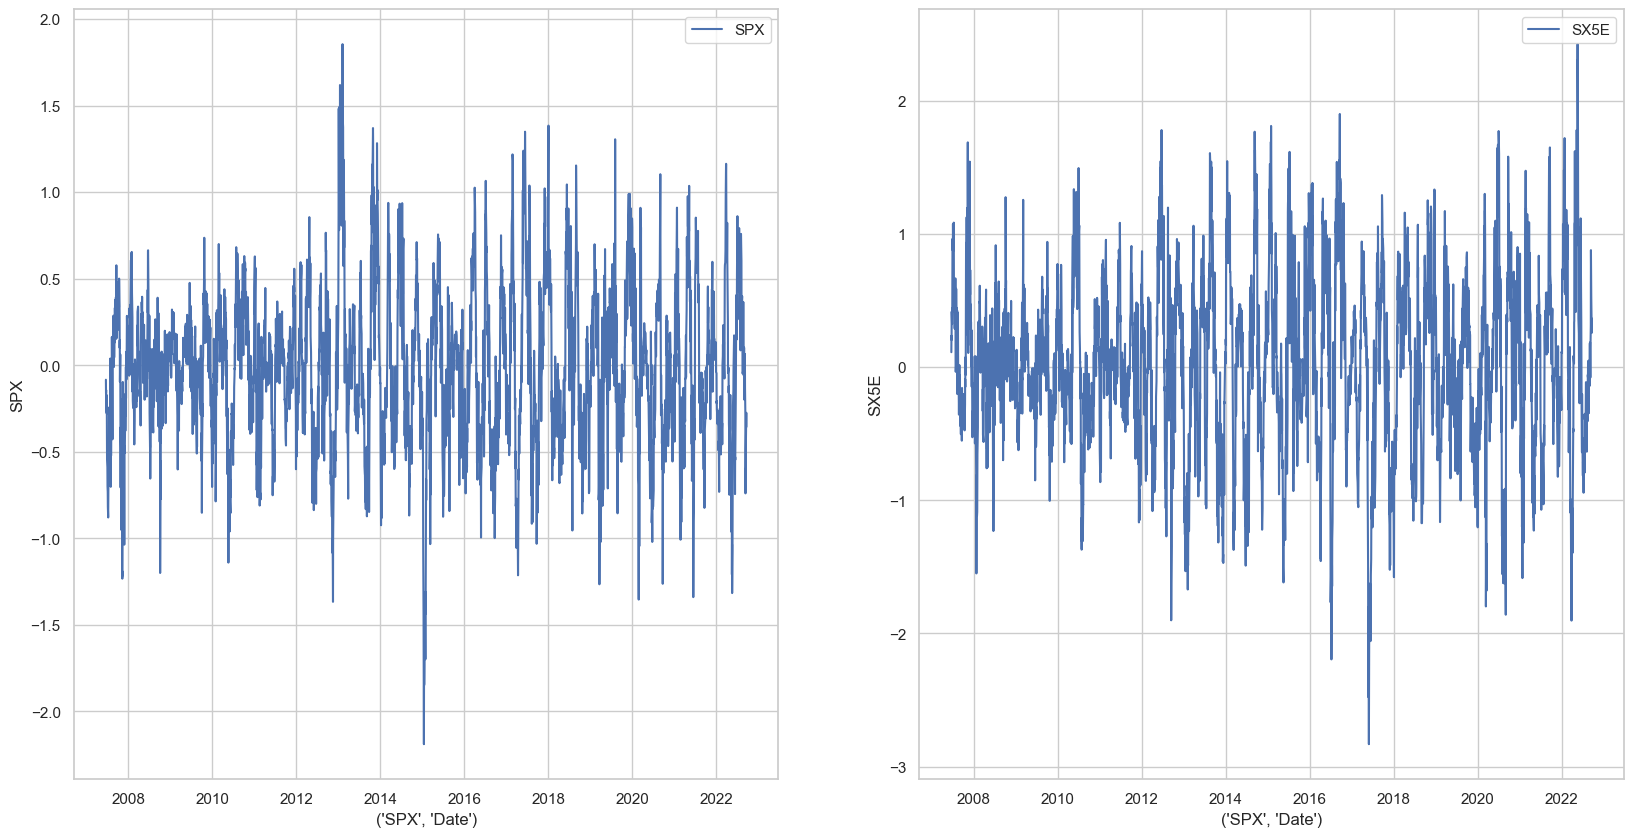

In [22]:
fig, ax = plt.subplots(1,2,figsize=(20,10))
sns.lineplot(s_scores['SPX'], ax=ax[0], label='SPX')
sns.lineplot(s_scores['SX5E'], ax=ax[1], label='SX5E')
plt.show()

We're gonna follow such trading rules:

* open short position if s-score > 0.75

* close short position if s-score < 0.35

* open long position if s-score < -0.75

* close long position if s-score > -0.25

In [23]:
#we take position at t and 
positions = pd.DataFrame(index=s_scores.index, columns=stocks, dtype=np.int64)
for stock in stocks:
    stock_poses = pd.DataFrame(index=s_scores.index, columns=[stock], dtype=np.int64)
    pos = 0
    for date in s_scores.index:
        s = s_scores.loc[date,stock]
        if s > 0.75:
            stock_poses.loc[date,stock] = -1
            pos = -1
        elif s < -0.75:
            stock_poses.loc[date,stock] = 1
            pos = 1
        elif s < 0.35 and pos == -1:
            stock_poses.loc[date,stock] = 0
            pos = 0
        elif s > -0.25 and pos == 1:
            stock_poses.loc[date,stock] = 0
            pos = 0
        else:
            stock_poses.loc[date,stock] = pos # hold
    positions[stock] = stock_poses

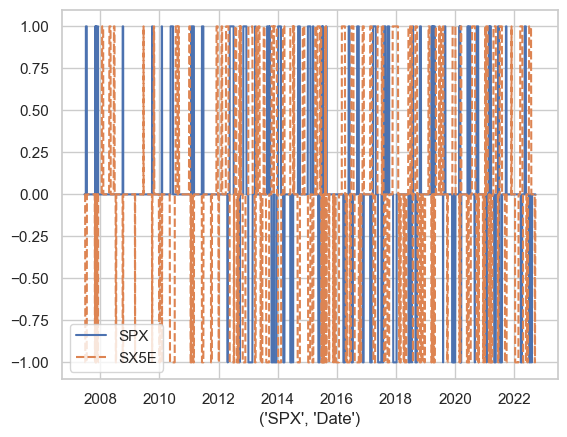

In [24]:
sns.lineplot(positions)
plt.show()

Thus, we observe quite frequent trading signals.

Assume at t=0 we have 1 dollar of capital to allocate. That means, we should redistribute it among our strategies according to our weights. We assume that if we take two positions at moment t, we invest 0.5 dollars in each, if we take only one position - invest entire 1 dollar in it.

For each $t=1,2\dots$ we compute daily returns as:

$$ r_t = \frac{r_{1,t}-\beta_{t-1}r_{2,t}}{1+\beta_{t-1}},$$

where $\beta$ > 0 and we use denominator to account for capital used to create current position.


We next compute $r_t$ for every t (assuming that we've invested 1 dollar at t-1) and with cumulative product recieve returns.

In [25]:
weights = positions.divide(np.where(positions.abs().sum(axis=1) == 0,
                                    [1]*positions.shape[0],
                                    positions.abs().sum(axis=1)),
                           axis=0)

In [26]:
weights[itraxx] = -((betas*weights).sum(axis=1).values)

To calculate our daily returns we multiply shifted weights (tommorow's position) by returns (today's return):

In [27]:
daily_rets = np.where((abs(weights).sum(axis=1)/2)==0, np.nan, (returns[WIND:] * weights.shift()).sum(axis=1)/(abs(weights).sum(axis=1)))

In [28]:
cumrets = pd.Series(np.nancumprod(daily_rets+1),
                    index=returns[WIND-1:].index, name='Cumulative return')

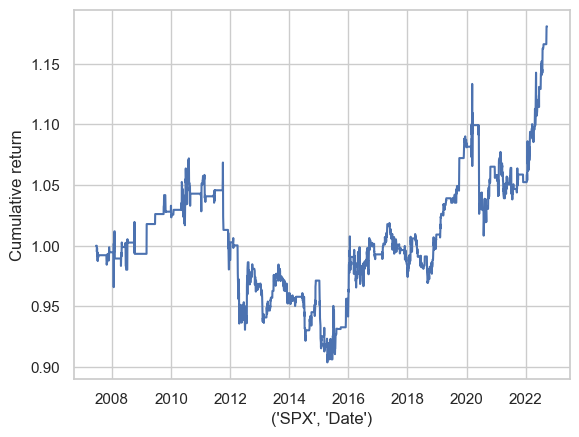

In [29]:
sns.lineplot(y=cumrets, x=cumrets.index)
plt.show()

Yearly relative return:

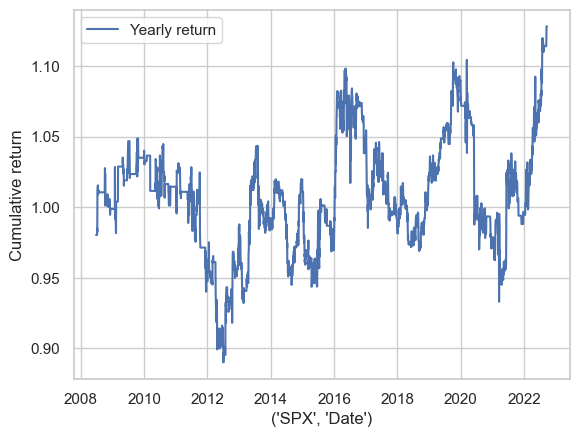

In [30]:
sns.lineplot(cumrets/cumrets.shift(252), label='Yearly return')
plt.show()

Maximum drawdown:

In [31]:
roll_max = cumrets.rolling(252, min_periods=1).max()
daily_dd = cumrets/roll_max - 1.0
max_daily_dd = daily_dd.rolling(252, min_periods=1).min()

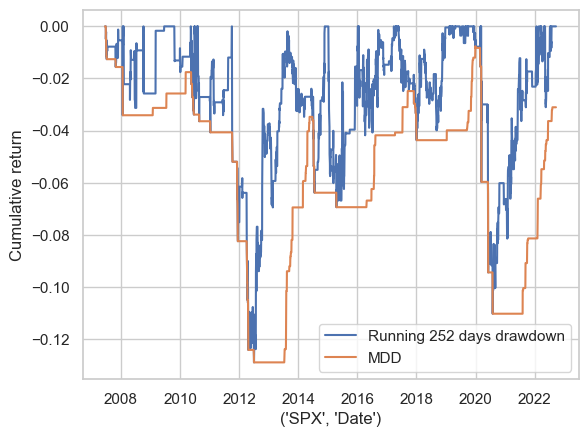

In [32]:
sns.lineplot(daily_dd, label='Running 252 days drawdown')
sns.lineplot(max_daily_dd, label='MDD')
plt.show()

Final statistics:

In [33]:
def calculate_stats(cumrets):
    if not isinstance(cumrets, (pd.Series, pd.DataFrame)):
        cumrets = pd.Series(cumrets)
    total_return = (cumrets.iloc[-1] - cumrets.iloc[0])/cumrets.iloc[0]
    returns = cumrets.pct_change()
    sharpe = np.sqrt(252) * np.nanmean(returns) / np.nanstd(returns)
    roll_max = cumrets.rolling(252, min_periods=1).max()
    daily_dd = cumrets/roll_max - 1.0
    max_daily_dd = daily_dd.rolling(252, min_periods=1).min()
    return total_return, sharpe, min(max_daily_dd)

In [34]:
results = pd.DataFrame(index=['Strategy', itraxx]+stocks, columns = ['Total return', 'Sharpe', 'MDD'])
results.loc['Strategy'] = calculate_stats(cumrets)
results.loc['SPX'] = calculate_stats(np.nancumprod(returns[WIND:]['SPX']+1))
results.loc['SX5E'] = calculate_stats(np.nancumprod(returns[WIND:]['SX5E']+1))
results.loc[itraxx] = calculate_stats(np.nancumprod(returns[WIND:][itraxx]+1))
results

Total return    Sharpe       MDD
Strategy                0.180838  0.219804 -0.129002
ER Itraxx Main Long     0.132518  0.339705 -0.058557
SPX                     1.505176  0.398613 -0.525785
SX5E                   -0.231815  0.040868 -0.533784

#### Random Observation

I've accidently noticed that if we hold each position for the next five days without any attentions to the s-score then our provitability increases.

In [35]:
for i, d in enumerate(positions.index):
    if i % 5 == 0:
        prev = positions.loc[d]
    else:
        positions.loc[d] = prev

In [36]:
weights = positions.divide(np.where(positions.abs().sum(axis=1) == 0,
                                    [1]*positions.shape[0],
                                    positions.abs().sum(axis=1)),
                           axis=0)

In [37]:
weights[itraxx] = -((betas*weights).sum(axis=1).values)

In [38]:
daily_rets = np.where((abs(weights).sum(axis=1)/2)==0, np.nan, (returns[WIND:] * weights.shift()).sum(axis=1)/(abs(weights).sum(axis=1)))

In [39]:
cumrets = pd.Series(np.nancumprod(daily_rets+1),
                    index=returns[WIND-1:].index, name='Cumulative return')

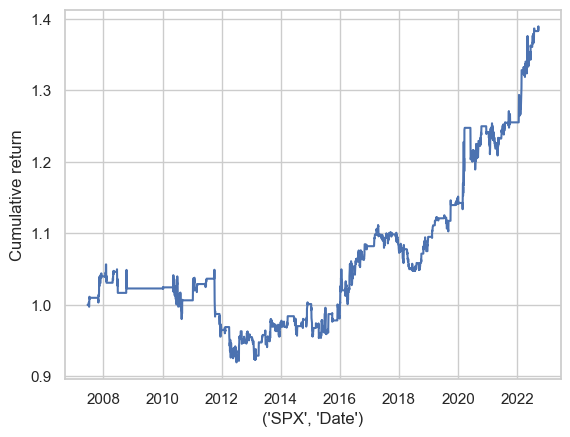

In [40]:
sns.lineplot(y=cumrets, x=cumrets.index)
plt.show()

Yearly relative return:

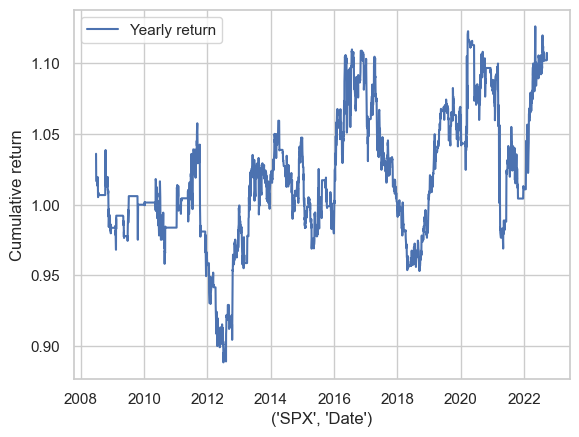

In [41]:
sns.lineplot(cumrets/cumrets.shift(252), label='Yearly return')
plt.show()

Maximum drawdown:

In [42]:
roll_max = cumrets.rolling(252, min_periods=1).max()
daily_dd = cumrets/roll_max - 1.0
max_daily_dd = daily_dd.rolling(252, min_periods=1).min()

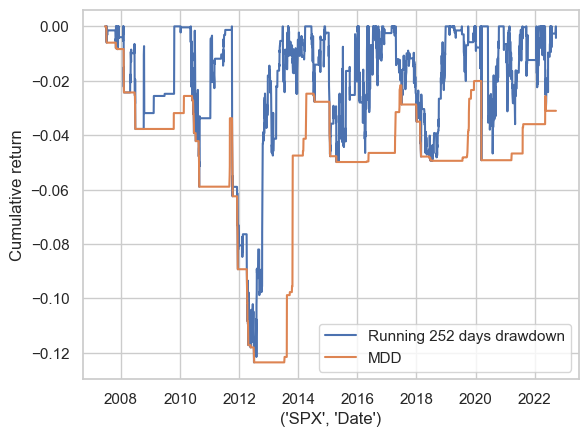

In [43]:
sns.lineplot(daily_dd, label='Running 252 days drawdown')
sns.lineplot(max_daily_dd, label='MDD')
plt.show()

Final statistics:

In [44]:
results = pd.DataFrame(index=['Strategy', itraxx]+stocks, columns = ['Total return', 'Sharpe', 'MDD'])
results.loc['Strategy'] = calculate_stats(cumrets)
results.loc['SPX'] = calculate_stats(np.nancumprod(returns[WIND:]['SPX']+1))
results.loc['SX5E'] = calculate_stats(np.nancumprod(returns[WIND:]['SX5E']+1))
results.loc[itraxx] = calculate_stats(np.nancumprod(returns[WIND:][itraxx]+1))
results

Total return    Sharpe       MDD
Strategy                 0.38369  0.412435   -0.1235
ER Itraxx Main Long     0.132518  0.339705 -0.058557
SPX                     1.505176  0.398613 -0.525785
SX5E                   -0.231815  0.040868 -0.533784

### ER CDX IG Long vs SPX, SX5E

We follow the same steps:

In [45]:
data = pd.read_excel('data/data_prepared.xlsx', index_col=0, header=[0,1])

In [46]:
data

SPX                        ER Itraxx Main Long             \
           Date Last Price      Volume                Date Last Price   
0    2007-03-20    1410.94  1182479104          2007-03-20   100.0000   
1    2007-03-21    1435.04  1399847424          2007-03-21   100.0287   
2    2007-03-22    1434.54  1286669440          2007-03-22   100.0833   
3    2007-03-23    1436.11  1122459392          2007-03-23   100.1090   
4    2007-03-26    1437.50  1187999488          2007-03-26   100.1063   
...         ...        ...         ...                 ...        ...   
3902 2022-09-16    3873.33  2094243200          2022-09-16   113.7744   
3903 2022-09-19    3899.89   609422592                 NaT        NaN   
3904 2022-09-20    3855.93   606929216          2022-09-20   113.6542   
3905 2022-09-21    3789.93   650767104          2022-09-21   113.5834   
3906 2022-09-22    3778.47           0          2022-09-22   113.3897   

     ER Itraxx Xover Long            ER CDX IG Long                  SX5E  \
                     Date Last Price           Date Last Price       Date   
0              2007-03-20   100.0000     2007-03-20   100.0000 2007-03-20   
1              2007-03-21   100.2951     2007-03-21   100.0850 2007-03-21   
2              2007-03-22   100.8037     2007-03-22   100.1147 2007-03-22   
3              2007-03-23   100.8924     2007-03-23   100.1108 2007-03-23   
4              2007-03-26   100.7493     2007-03-26   100.0683 2007-03-26   
...                   ...        ...            ...        ...        ...   
3902           2022-09-16   198.5412     2022-09-16   111.0792 2022-09-16   
3903                  NaT        NaN     2022-09-19   111.2009 2022-09-19   
3904           2022-09-20   197.7231     2022-09-20   111.0292 2022-09-20   
3905           2022-09-21   197.6984     2022-09-21   110.9141 2022-09-21   
3906           2022-09-22   196.4054     2022-09-22        NaN 2022-09-22   

                               
     Last Price        Volume  
0     4079.5200  9.134466e+08  
1     4078.2900  8.624504e+08  
2     4170.0801  1.174437e+09  
3     4191.5801  9.219071e+08  
4     4142.1099  9.893587e+08  
...         ...           ...  
3902  3500.4099  6.839488e+08  
3903  3499.4900  2.459344e+08  
3904  3467.0901  3.551371e+08  
3905  3491.8701  2.827494e+08  
3906  3427.1399           NaN  

[3907 rows x 12 columns]

In [47]:
cdx = 'ER CDX IG Long'
stocks = ['SPX', 'SX5E']

In [48]:
tmp = data.loc[:, idx[[cdx] + stocks, :]].dropna(how='any', axis=0)
tmp.reset_index(drop=True, inplace=True)
dates = tmp.loc[:, idx['SPX', 'Date']]
tmp = tmp.loc[:, idx[[cdx] + stocks,'Last Price']]
tmp.columns = [x[0] for x in tmp.columns]
tmp.index = dates

We transfrom our prices to returns

In [49]:
returns = tmp.pct_change().dropna()
returns.head()

ER CDX IG Long       SPX      SX5E
(SPX, Date)                                    
2007-03-21         0.000850  0.017081 -0.000302
2007-03-22         0.000297 -0.000348  0.022507
2007-03-23        -0.000039  0.001094  0.005156
2007-03-26        -0.000425  0.000968 -0.011802
2007-03-27        -0.000206 -0.006184  0.002776

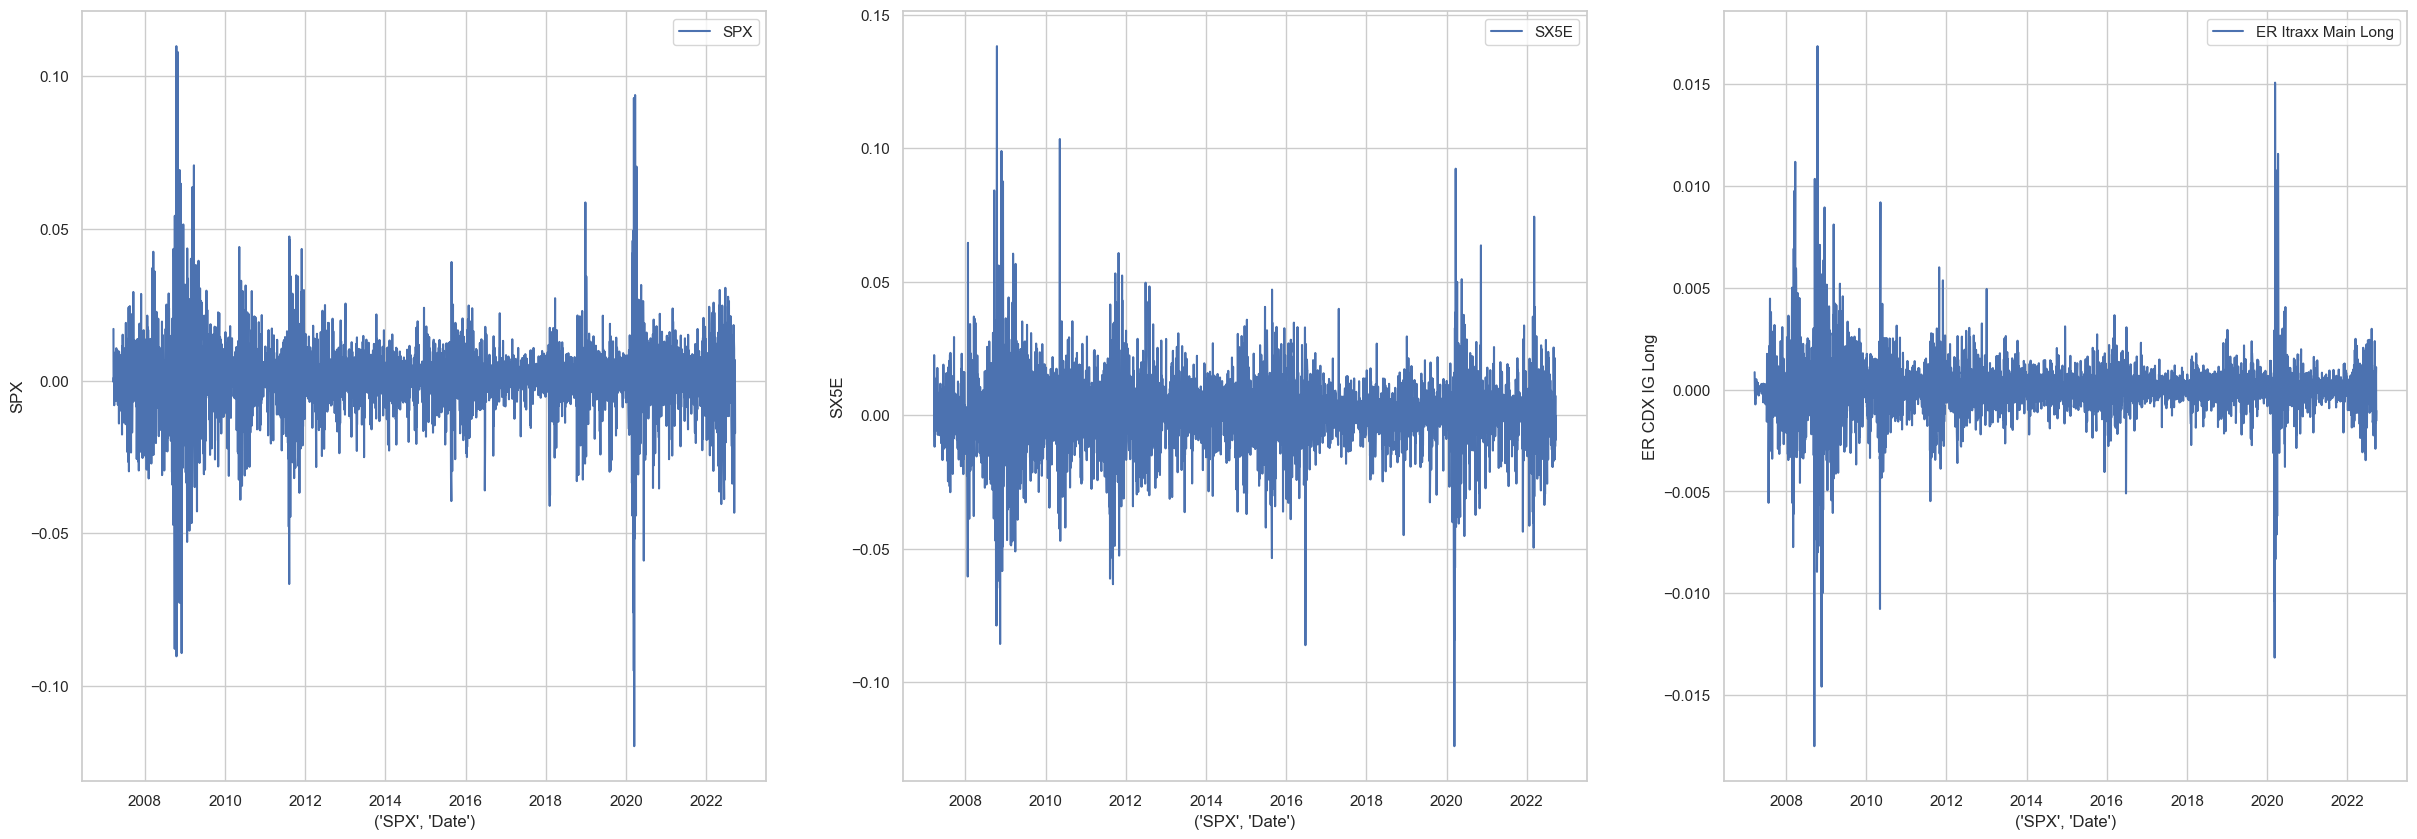

In [50]:
fix, ax = plt.subplots(1,len(stocks)+1, figsize=(10*(len(stocks)+1),10))
for i in range(len(stocks)):
    sns.lineplot(returns[stocks[i]], ax=ax[i], label=stocks[i])
sns.lineplot(returns[cdx], ax=ax[-1], label=itraxx)
plt.show()

Following the article, we set 60 days formation period and regress each stock on our itraxx index in the folliwing models (i.e. we develop two parallel strategies):

In [51]:
WIND = 60
s_scores = pd.DataFrame(index=returns.index[WIND-1:], columns=stocks)
betas = pd.DataFrame(index=returns.index[WIND-1:], columns=stocks)

for date in returns.index[WIND-1:]:
    tmp_train = returns.loc[:date]
    tmp_train = tmp_train.iloc[-WIND:]
    # for some reason it works better with standardized returns for signal generation
    # borrowed from medium article
    tmp_train = (tmp_train - tmp_train.mean())/tmp_train.std()
    
    ou_params = pd.DataFrame(index=stocks,
                         columns=['a', 'b', 'Var(zeta)','theta', 'tau','mu', 'sigma', 'sigma_eq'])
    
    for stock in stocks:
        X = tmp_train[cdx]
        y = tmp_train[stock]

        # first regression
        X = sm.add_constant(X)
        lr1 = sm.OLS(y, X)
        res1 = lr1.fit()
        beta = res1.params[cdx]
        betas.loc[date, stock] = beta
        epsilon = (y - X@res1.params).values

        # second regression
        Xk = epsilon.cumsum()
        X = Xk[:-1] #lags
        X = sm.add_constant(X)
        y = Xk[1:]
        lr2 = sm.OLS(y, X)
        res2 = lr2.fit()
        a, b = res2.params
        dzeta = y-X@res2.params

        theta = -np.log(b)*252
        mu = a/(1-b)
        dzeta_var = np.var(dzeta)
        sigma = np.sqrt(dzeta_var*2*theta/(1-b**2))
        sigma_eq = np.sqrt(dzeta_var/(1-b**2))

        tau = 1/theta #speed of mean-reversion
        ou_params.loc[stock] = [a, b, dzeta_var, theta, tau, mu, sigma, sigma_eq]
    
    ou_params['m_bar'] = (ou_params['a']/(1 - ou_params['b']) - ou_params['a'].mean()/(1-ou_params['b'].mean()))
    ou_params['s'] = -ou_params['m_bar'] / ou_params['sigma_eq']
    #ou_params['s'] = (y[-1] - ou_params['mu'])/ou_params['sigma_eq']
    s_scores.loc[date] = ou_params['s']

In [52]:
betas

SPX      SX5E
(SPX, Date)                    
2007-06-15    0.60397  0.513993
2007-06-18   0.549281  0.582732
2007-06-19   0.547847  0.564655
2007-06-20   0.591068  0.519465
2007-06-21   0.591054  0.499189
...               ...       ...
2022-09-15   0.909569  0.583397
2022-09-16   0.910213  0.576477
2022-09-19   0.911398  0.577398
2022-09-20   0.907463  0.555351
2022-09-21    0.90823  0.542037

[3788 rows x 2 columns]

In [53]:
s_scores.head()

SPX      SX5E
(SPX, Date)                    
2007-06-15   0.180786 -0.249193
2007-06-18   0.097528 -0.245817
2007-06-19   0.080634 -0.126343
2007-06-20  -0.102158  0.153126
2007-06-21   0.268571   -0.3682

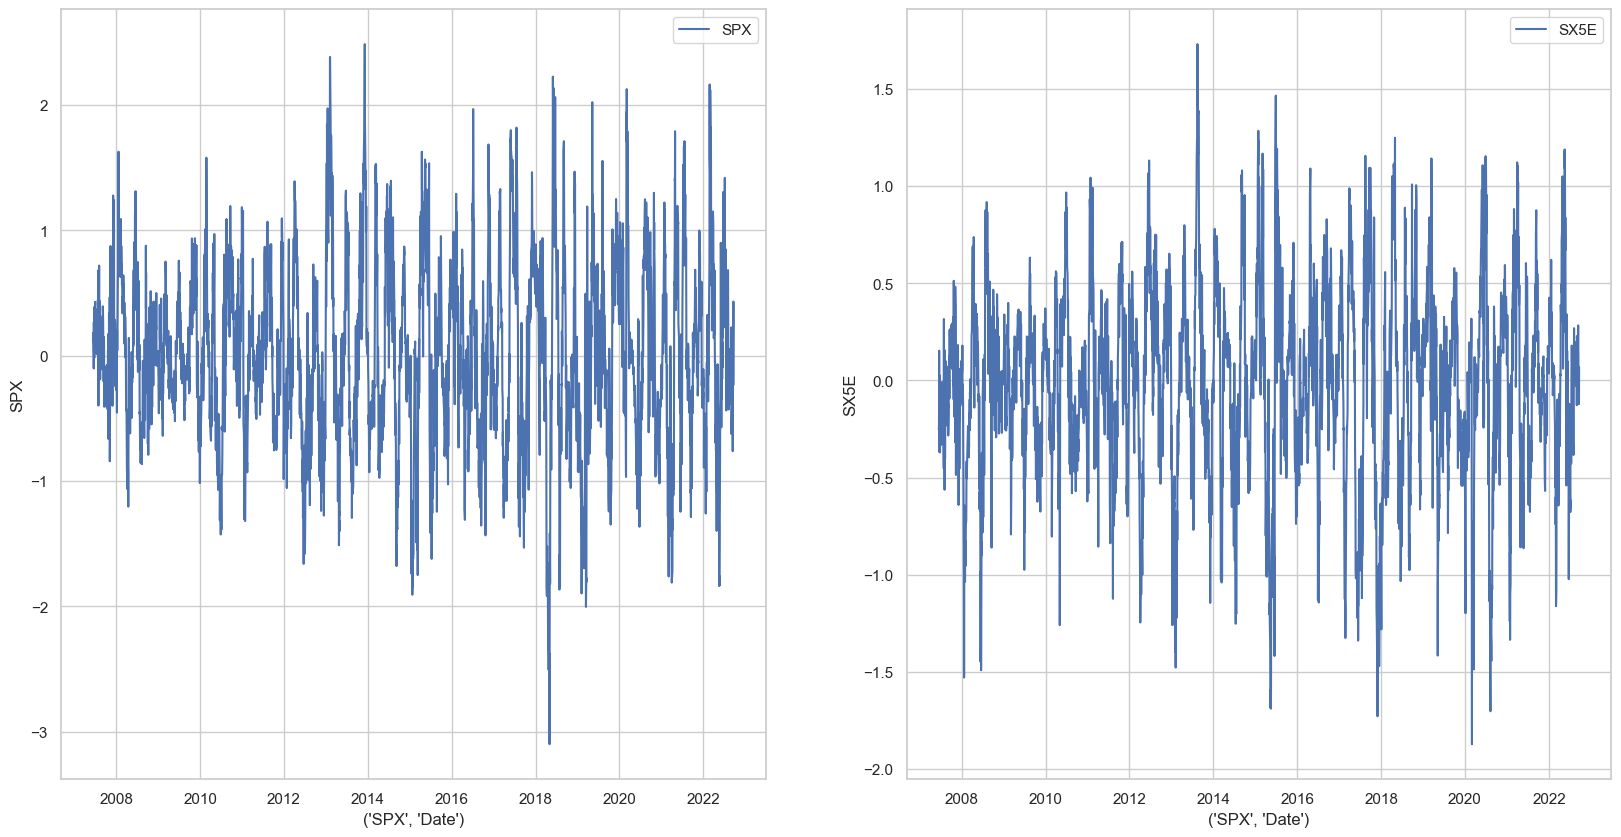

In [54]:
fig, ax = plt.subplots(1,2,figsize=(20,10))
sns.lineplot(s_scores['SPX'], ax=ax[0], label='SPX')
sns.lineplot(s_scores['SX5E'], ax=ax[1], label='SX5E')
plt.show()

We're gonna follow such trading rules as only less frequent trading gives here better result:

* open short position if s-score > 1.25

* close short position if s-score < 0.75

* open long position if s-score < -1.25

* close long position if s-score > -0.75


In [94]:
#we take position at t and get returns at t+1
positions = pd.DataFrame(index=s_scores.index, columns=stocks, dtype=np.int64)
for stock in stocks:
    stock_poses = pd.DataFrame(index=s_scores.index, columns=[stock], dtype=np.int64)
    pos = 0
    for date in s_scores.index:
        s = s_scores.loc[date,stock]
        if s > 1.25:
            stock_poses.loc[date,stock] = -1
            pos = -1
        elif s < -1.25:
            stock_poses.loc[date,stock] = 1
            pos = 1
        elif s < 0.75 and pos == -1:
            stock_poses.loc[date,stock] = 0
            pos = 0
        elif s > -0.75 and pos == 1:
            stock_poses.loc[date,stock] = 0
            pos = 0
        else:
            stock_poses.loc[date,stock] = pos # hold
    positions[stock] = stock_poses

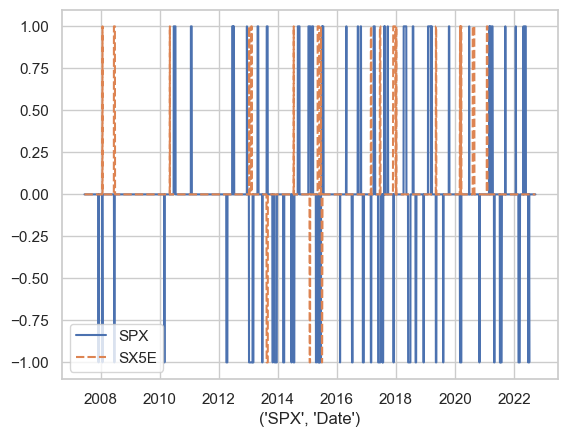

In [95]:
sns.lineplot(positions)
plt.show()

In [96]:
weights = positions.divide(np.where(positions.abs().sum(axis=1) == 0,
                                    [1]*positions.shape[0],
                                    positions.abs().sum(axis=1)),
                           axis=0)

In [97]:
weights[cdx] = -((betas*weights).sum(axis=1).values)

To calculate our daily returns we multiply shifted weights (tommorow's position) by returns (today's return):

In [98]:
daily_rets = np.where((abs(weights).sum(axis=1)/2)==0, np.nan, (returns[WIND:] * weights.shift()).sum(axis=1)/(abs(weights).sum(axis=1)))

In [99]:
cumrets = pd.Series(np.nancumprod(daily_rets+1),
                    index=returns[WIND-1:].index, name='Cumulative return')

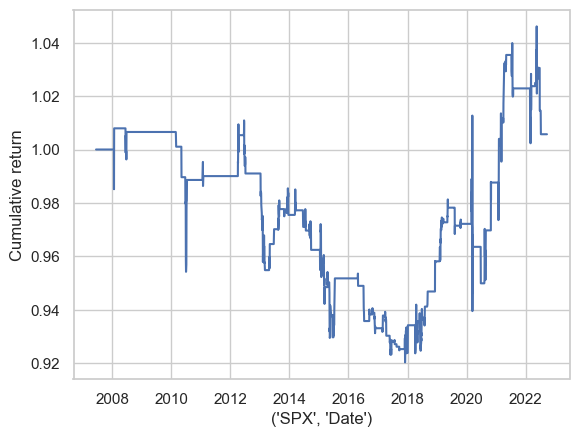

In [100]:
sns.lineplot(y=cumrets, x=cumrets.index)
plt.show()

Yearly relative return:

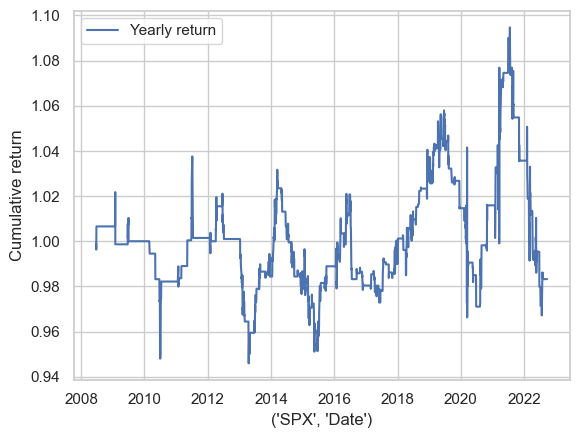

In [101]:
sns.lineplot(cumrets/cumrets.shift(252), label='Yearly return')
plt.show()

Maximum drawdown:

In [102]:
roll_max = cumrets.rolling(252, min_periods=1).max()
daily_dd = cumrets/roll_max - 1.0
max_daily_dd = daily_dd.rolling(252, min_periods=1).min()

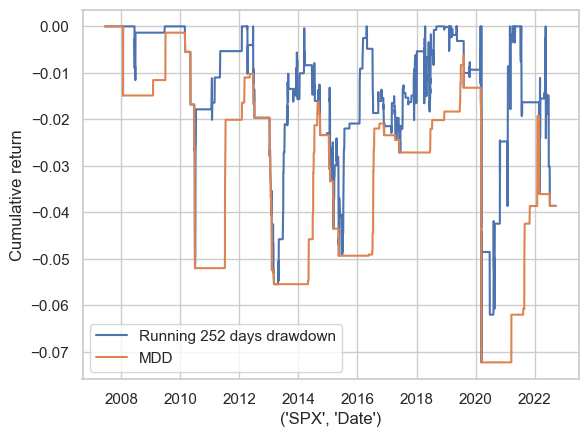

In [103]:
sns.lineplot(daily_dd, label='Running 252 days drawdown')
sns.lineplot(max_daily_dd, label='MDD')
plt.show()

Final statistics:

In [104]:
results = pd.DataFrame(index=['Strategy', cdx]+stocks, columns = ['Total return', 'Sharpe', 'MDD'])
results.loc['Strategy'] = calculate_stats(cumrets)
results.loc['SPX'] = calculate_stats(np.nancumprod(returns[WIND:]['SPX']+1))
results.loc['SX5E'] = calculate_stats(np.nancumprod(returns[WIND:]['SX5E']+1))
results.loc[cdx] = calculate_stats(np.nancumprod(returns[WIND:][cdx]+1))
results

Total return    Sharpe       MDD
Strategy           0.005715  0.029153 -0.072263
ER CDX IG Long     0.107509  0.293302 -0.086437
SPX                 1.47538  0.393483 -0.525785
SX5E              -0.229205  0.042522 -0.533784

Here we have much worse results.

#### Random Observation

In [81]:
for i, d in enumerate(positions.index):
    if i % 5 == 0:
        prev = positions.loc[d]
    else:
        positions.loc[d] = prev

In [82]:
weights = positions.divide(np.where(positions.abs().sum(axis=1) == 0,
                                    [1]*positions.shape[0],
                                    positions.abs().sum(axis=1)),
                           axis=0)

In [83]:
weights[itraxx] = -((betas*weights).sum(axis=1).values)

In [84]:
daily_rets = np.where((abs(weights).sum(axis=1)/2)==0, np.nan, (returns[WIND:] * weights.shift()).sum(axis=1)/(abs(weights).sum(axis=1)))

In [85]:
cumrets = pd.Series(np.nancumprod(daily_rets+1),
                    index=returns[WIND-1:].index, name='Cumulative return')

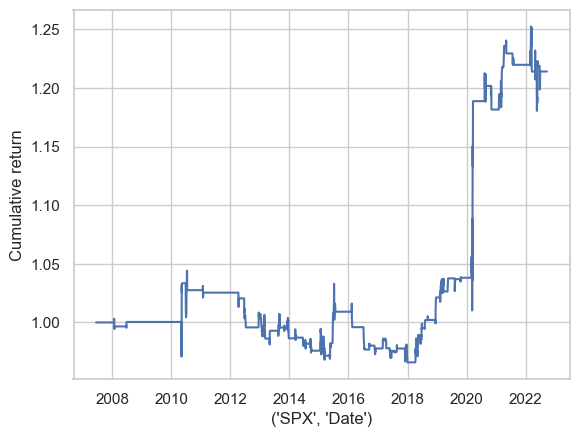

In [86]:
sns.lineplot(y=cumrets, x=cumrets.index)
plt.show()

Yearly relative return:

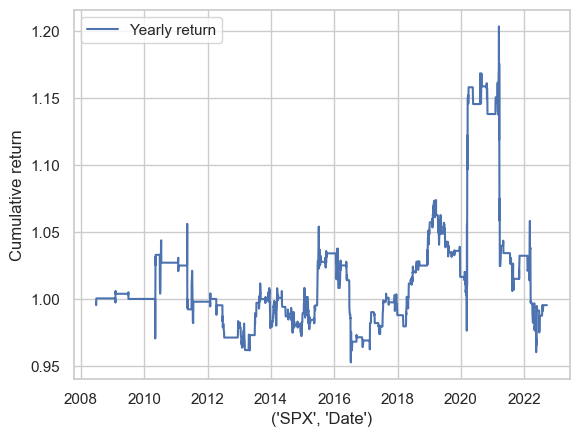

In [87]:
sns.lineplot(cumrets/cumrets.shift(252), label='Yearly return')
plt.show()

Maximum drawdown:

In [88]:
roll_max = cumrets.rolling(252, min_periods=1).max()
daily_dd = cumrets/roll_max - 1.0
max_daily_dd = daily_dd.rolling(252, min_periods=1).min()

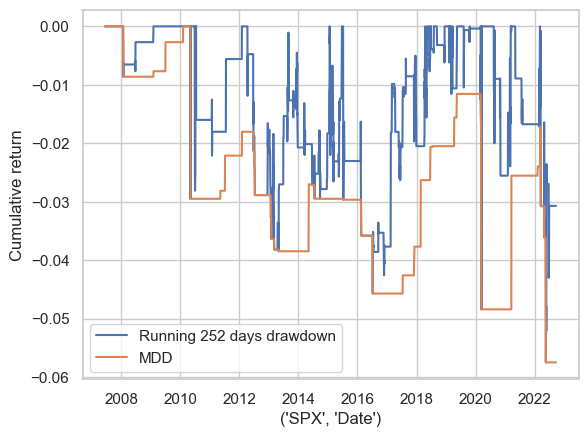

In [89]:
sns.lineplot(daily_dd, label='Running 252 days drawdown')
sns.lineplot(max_daily_dd, label='MDD')
plt.show()

Final statistics:

In [93]:
results = pd.DataFrame(index=['Strategy', cdx]+stocks, columns = ['Total return', 'Sharpe', 'MDD'])
results.loc['Strategy'] = calculate_stats(cumrets)
results.loc['SPX'] = calculate_stats(np.nancumprod(returns[WIND:]['SPX']+1))
results.loc['SX5E'] = calculate_stats(np.nancumprod(returns[WIND:]['SX5E']+1))
results.loc[cdx] = calculate_stats(np.nancumprod(returns[WIND:][cdx]+1))
results

Total return    Sharpe       MDD
Strategy           0.214004  0.280969 -0.057505
ER CDX IG Long     0.107509  0.293302 -0.086437
SPX                 1.47538  0.393483 -0.525785
SX5E              -0.229205  0.042522 -0.533784

TODO:

1) Check another strategy from the paper